<a href="https://colab.research.google.com/github/porori1224/2024_Chosun_osp_Deepfake-detection-Challenge/blob/porori1224/Try_DataSet_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 문제 상황

- EfficientNet-B0 학습 과정 런타임 과도 이슈 및 과적합 발생
- 검증 손실값 높음

https://colab.research.google.com/drive/1TT_WpGK4c8GSLCpkwVvrXthXl2eMQXmg?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
# check the current path
print(os.getcwd()) # /content

# You should copy the path : 왼쪽 폴더에서 오른쪽 버튼 후 경로복사
os.chdir('/content/drive/MyDrive/Colab Notebooks/2024_OSP_SW')

print(os.getcwd()) # path has been changed

/content
/content/drive/.shortcut-targets-by-id/10WgLiaOCZzMlANImGj_dPtI-hdfRCUe_/2024_OSP_SW


In [ ]:
!pip install retina-face

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
# 필요시 설치
!pip install scikit-learn matplotlib

# 1. JSON 로드 및 라벨링

In [ ]:
import pandas as pd
import json

# JSON 파일 경로
json_file = "/content/drive/MyDrive/Colab Notebooks/2024_OSP_SW/00~01/dfdc_train_part_0/metadata.json"

# JSON 파일 로드
with open(json_file, "r") as f:
    metadata = json.load(f)

# JSON 데이터를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(metadata, orient="index").reset_index()
df.columns = ["filename", "label", "split", "original"]

# 라벨링을 0과 1로 매핑
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

# 데이터프레임에서 필요한 컬럼만 출력하도록 정리
print(df[["filename", "label", "split", "original"]].head(10))

         filename  label  split        original
0  owxbbpjpch.mp4      0  train  wynotylpnm.mp4
1  vpmyeepbep.mp4      1  train             NaN
2  fzvpbrzssi.mp4      1  train             NaN
3  htorvhbcae.mp4      0  train  wclvkepakb.mp4
4  fckxaqjbxk.mp4      0  train  vpmyeepbep.mp4
5  sphirandia.mp4      0  train  jawgcggquk.mp4
6  vsmadeuczx.mp4      0  train  qarqtkvgby.mp4
7  ohaqlzfnuv.mp4      0  train  sttnfyptum.mp4
8  komngcqveq.mp4      0  train  kqlvggiqee.mp4
9  iafvzgpbix.mp4      0  train  lzbmwwejxb.mp4


# 2. 데이터 준비
- CSV를 이용한 데이터셋 분류 및 저장
	-	테스트 데이터: 20%
	- 학습 데이터: 80% × 80% = 64%
	-	검증 데이터: 80% × 20% = 16%

In [ ]:
# JSON 파일 로드 확인
print(f"Metadata loaded: {len(metadata)} records")
print(list(metadata.keys())[:5])  # JSON 데이터 키 확인

# 데이터프레임 형식 확인
print(df.head())

# 필터링 조건 확인
filtered_df = df[df["filename"].str.startswith(("00"))]
print(f"Filtered DataFrame size after filter: {len(filtered_df)}")
print(filtered_df.head())

Metadata loaded: 1334 records
['owxbbpjpch.mp4', 'vpmyeepbep.mp4', 'fzvpbrzssi.mp4', 'htorvhbcae.mp4', 'fckxaqjbxk.mp4']
         filename  label  split        original
0  owxbbpjpch.mp4      0  train  wynotylpnm.mp4
1  vpmyeepbep.mp4      1  train             NaN
2  fzvpbrzssi.mp4      1  train             NaN
3  htorvhbcae.mp4      0  train  wclvkepakb.mp4
4  fckxaqjbxk.mp4      0  train  vpmyeepbep.mp4
Filtered DataFrame size after filter: 0
Empty DataFrame
Columns: [filename, label, split, original]
Index: []


In [ ]:
import os
import pandas as pd
import json

# JSON 파일 경로 (dfdc_train_part_0 사용)
json_file = "/content/drive/MyDrive/Colab Notebooks/2024_OSP_SW/00~01/dfdc_train_part_0/metadata.json"

# JSON 파일 로드
with open(json_file, "r") as f:
    metadata = json.load(f)

# JSON 데이터를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(metadata, orient="index").reset_index()
df.columns = ["filename", "label", "split", "original"]

# 라벨링을 0과 1로 매핑
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

# 데이터프레임에서 필요한 컬럼만 출력하도록 정리
print(f"Total data size: {len(df)}")
print(df[["filename", "label", "split", "original"]].head(10))

# 비디오 파일 경로 생성 (dfdc_train_part_0 경로)
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/00~02/dfdc_train_part_0"
df["filepath"] = df["filename"].apply(lambda x: os.path.join(base_dir, x))

# 데이터 크기 확인
print(f"Filtered DataFrame size: {len(df)}")
print(df["label"].value_counts())  # 각 클래스별 데이터 수 확인

# 데이터 분리 (80% Train + Validation, 20% Test)
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42, stratify=train_val_df["label"])

# 분리된 데이터 크기 확인
print(f"Train DataFrame size: {len(train_df)}")
print(f"Validation DataFrame size: {len(val_df)}")
print(f"Test DataFrame size: {len(test_df)}")

# CSV 파일로 저장
private_dir = "/content/drive/MyDrive/Colab Notebooks"
os.makedirs(private_dir, exist_ok=True)

train_csv_path = os.path.join(private_dir, "train_split.csv")
val_csv_path = os.path.join(private_dir, "val_split.csv")
test_csv_path = os.path.join(private_dir, "test_split.csv")

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print(f"Train CSV saved to: {train_csv_path}")
print(f"Validation CSV saved to: {val_csv_path}")
print(f"Test CSV saved to: {test_csv_path}")

Total data size: 1334
         filename  label  split        original
0  owxbbpjpch.mp4      0  train  wynotylpnm.mp4
1  vpmyeepbep.mp4      1  train             NaN
2  fzvpbrzssi.mp4      1  train             NaN
3  htorvhbcae.mp4      0  train  wclvkepakb.mp4
4  fckxaqjbxk.mp4      0  train  vpmyeepbep.mp4
5  sphirandia.mp4      0  train  jawgcggquk.mp4
6  vsmadeuczx.mp4      0  train  qarqtkvgby.mp4
7  ohaqlzfnuv.mp4      0  train  sttnfyptum.mp4
8  komngcqveq.mp4      0  train  kqlvggiqee.mp4
9  iafvzgpbix.mp4      0  train  lzbmwwejxb.mp4
Filtered DataFrame size: 1334
label
0    1248
1      86
Name: count, dtype: int64
Train DataFrame size: 853
Validation DataFrame size: 214
Test DataFrame size: 267
Train CSV saved to: /content/drive/MyDrive/Colab Notebooks/train_split.csv
Validation CSV saved to: /content/drive/MyDrive/Colab Notebooks/val_split.csv
Test CSV saved to: /content/drive/MyDrive/Colab Notebooks/test_split.csv


# 3. 데이터 로드 및 전처리
- Dataset 클래스
  - RetinaFace를 이용하여 얼굴 검출 및 크롭
  - 중간 프레임 선택하여 Temporal Consistency 적용

- Transform
  - Random Erasing 및 Augmentatio
  - 크기 변환(Resize), 텐서 변환(ToTensor), 정규화(Nomalize)

- DataLoader
  - 학습용(train_loader), 검증용(val_loader) 생성
  - 학습 데이터는 무작위 배치 생성

In [ ]:
missing_files = []
for _, row in train_df.iterrows():
    processed_file = os.path.join(output_dir, row['filename'].replace('.mp4', '_processed.jpg'))
    if not os.path.exists(processed_file):
        missing_files.append(processed_file)

print(f"Missing files: {missing_files}")

NameError: name 'output_dir' is not defined

In [ ]:
import pandas as pd
from sklearn.utils import resample

# 기존 데이터프레임 로드 (예: df)
fake_df = df[df['label'] == 0]
real_df = df[df['label'] == 1]

# Fake 데이터를 Real 데이터와 동일한 개수로 샘플링
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)

# Fake와 Real 데이터를 결합
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# 업데이트된 데이터 크기 출력
print(f"Balanced dataset size: {len(balanced_df)}")
print(balanced_df['label'].value_counts())

Balanced dataset size: 172
label
1    86
0    86
Name: count, dtype: int64


In [ ]:
import os
import cv2
from retinaface import RetinaFace
from multiprocessing import Pool

# GPU 사용 설정 (필요한 경우 수정)
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # GPU 비활성화: 이 줄을 주석 처리하거나 제거하여 GPU 활성화

# 경로 설정
input_dir = "/content/drive/MyDrive/Colab Notebooks/2024_OSP_SW/00~01/dfdc_train_part_0"
output_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"
os.makedirs(output_dir, exist_ok=True)

# 스킵된 비디오 기록
skipped_videos = set()  # 중복 방지

# 비디오 처리 함수
def process_video(video_info):
    video_path, output_path = video_info
    try:
        # 비디오 파일 열기
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Skipping invalid video: {video_path}")
            skipped_videos.add(video_path)
            return None

        # 프레임 읽기
        frames = []
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(frame)
        cap.release()

        if len(frames) == 0:
            print(f"Skipping empty video: {video_path}")
            skipped_videos.add(video_path)
            return None

        # 여러 프레임 선택 (중간 프레임 + 랜덤 프레임)
        frame_candidates = [frames[len(frames) // 2]]  # 중간 프레임 추가
        if len(frames) > 1:
            frame_candidates.append(frames[len(frames) // 3])  # 1/3 위치 프레임 추가

        # 해상도 축소 및 얼굴 감지 시도
        for frame in frame_candidates:
            frame_resized = cv2.resize(frame, (160, 90))  # 낮은 해상도로 축소
            faces = RetinaFace.detect_faces(frame_resized)
            if isinstance(faces, dict) and len(faces) > 0:
                # 얼굴 크롭
                bbox = list(faces.values())[0]["facial_area"]
                cropped_face = frame_resized[bbox[1]:bbox[3], bbox[0]:bbox[2]]
                os.makedirs(os.path.dirname(output_path), exist_ok=True)  # 경로 생성
                cv2.imwrite(output_path, cropped_face)
                print(f"Processed and saved: {output_path}")
                return output_path

        # 얼굴 감지 실패 시
        print(f"Skipping video without detectable faces: {video_path}")
        skipped_videos.add(video_path)
        return None

    except FileNotFoundError:
        print(f"File not found: {video_path}")
        skipped_videos.add(video_path)
        return None
    except Exception as e:
        print(f"Unexpected error processing {video_path}: {e}")
        skipped_videos.add(video_path)
        return None

# 비디오 정보 리스트 생성
video_info_list = [
    (os.path.join(input_dir, filename), os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_processed.jpg"))
    for filename in os.listdir(input_dir) if filename.endswith(".mp4")
]

# 병렬 처리 함수
def process_videos_in_parallel(video_info_list, num_processes=os.cpu_count()):  # CPU 코어 수 사용
    with Pool(processes=num_processes) as pool:
        results = pool.map(process_video, video_info_list)
    return results

# 실행
print("Starting optimized video processing...")
processed_files = process_videos_in_parallel(video_info_list, num_processes=4)  # 프로세스 수 조정 가능
print("Processing complete.")

# 스킵된 비디오 저장
skipped_videos_path = "/content/skipped_videos.txt"
with open(skipped_videos_path, "w") as f:
    for video in skipped_videos:
        f.write(f"{video}\n")
print(f"Skipped videos saved to: {skipped_videos_path}")

Starting optimized video processing...
24-11-28 06:28:54 - Directory /root/.deepface created24-11-28 06:28:54 - Directory /root/.deepface/weights created

24-11-28 06:28:54 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h524-11-28 06:28:54 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5

24-11-28 06:28:54 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
24-11-28 06:28:54 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
Downloading...
From:From:  https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5To: /root/.deepface/weights/retinaface.h5

To: /root/.deepface/weights/retinaface.h5
  0%|          | 0.00/119M [00:00<?, ?B/s]Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
  0%|          | 0.00/119M [00:00<?, ?B/s]Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 290MB/s]

100%|██████████| 119M/119M [00:00<00:00, 310MB/s] 
100%|██████████| 119M/119M [00:00<00:00, 285MB/s]


Processed and saved: /content/drive/MyDrive/Colab Notebooks/processed_videos/xewwsdhdro_processed.jpg
Processed and saved: /content/drive/MyDrive/Colab Notebooks/processed_videos/bmhghysucl_processed.jpg
Processed and saved: /content/drive/MyDrive/Colab Notebooks/processed_videos/yajhwipypq_processed.jpg
Skipping video without detectable faces: /content/drive/MyDrive/Colab Notebooks/2024_OSP_SW/00~01/dfdc_train_part_0/yptchajnvb.mp4


KeyboardInterrupt: 

# 4. 모델 정의 및 훈련
- 모델
  - EfficientNet-B0와 ConvNextTiny를 각각 초기화 -> 앙상블 예정

- 학습 및 검증
  - train_and_evaluate 함수
    - 학습 데이터(train_loader) 모델로 학습 진행
    - 검증 데이터(val_loader)로 검증 손실(Val Loss)를 평가
  - 학습 과정에서의 손실값을 출력

# Try Addressing Overfitting
- L2 정규화 적용
  - torch.optim.Adam 옵티마이저의 weight_decay 인자를 통해 L2 정규화를 적용.
- Dropout 추가
  - 모델의 Fully Connected(FC) 레이어에 Dropout을 추가하여 적용.

In [ ]:
import torch

# GPU 상태 확인
print(torch.cuda.is_available())
print(torch.cuda.memory_allocated())
print(torch.cuda.memory_reserved())

True
0
0


In [ ]:
import torch
print(torch.__version__)  # PyTorch 버전 출력
print(torch.cuda.is_available())  # CUDA 사용 가능 여부 확인

2.5.1+cu121
True


In [ ]:
from timm import create_model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        """
        Args:
            image_dir (str): 전처리된 이미지가 저장된 디렉토리
            labels (dict): 이미지 파일명과 해당 라벨(FAKE=0, REAL=1) 매핑 딕셔너리
            transform (callable, optional): 이미지 전처리(transformations)
        """
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")  # 이미지 열기

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 경로 및 데이터 설정
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"

# 파일명과 라벨 매핑 생성
labels = {f"{os.path.splitext(filename)[0]}_processed.jpg": label
          for filename, label in zip(train_df["filename"], train_df["label"])}

# 이미지 전처리(transformations)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = ProcessedDataset(processed_dir, labels, transform=transform)  # 검증 데이터 설정
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 모델 정의 함수 (Dropout 추가)
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)  # 1280은 EfficientNet-B0의 출력 크기

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)  # 768은 ConvNext-Tiny의 출력 크기

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)
convnext_tiny.to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()

optimizer_efficientnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)

# 학습률 스케줄러 정의
scheduler_efficientnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode="min", factor=0.5, patience=2)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# 학습 및 검증 함수
def train_and_evaluate(model, optimizer, train_loader, val_loader, num_epochs=10, model_name="Model"):
    for epoch in range(num_epochs):
        # 학습 단계
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)

        # 검증 단계
        val_loss = evaluate_model(model, val_loader)

        # 학습률 스케줄러 업데이트
        if model_name == "EfficientNet-B0":
            scheduler_efficientnet.step(val_loss)
        elif model_name == "ConvNextTiny":
            scheduler_convnext.step(val_loss)

        print(f"{model_name} - Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 학습 및 검증 수행
print("Training EfficientNet-B0...")
train_and_evaluate(efficientnet_b0, optimizer_efficientnet, train_loader, val_loader, num_epochs=10, model_name="EfficientNet-B0")

print("Training ConvNextTiny...")
train_and_evaluate(convnext_tiny, optimizer_convnext, train_loader, val_loader, num_epochs=10, model_name="ConvNextTiny")

Training EfficientNet-B0...


KeyboardInterrupt: 

In [ ]:
from timm import create_model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
from sklearn.utils import resample

# Fake와 Real 데이터 균형 조정
fake_df = train_df[train_df["label"] == 0]
real_df = train_df[train_df["label"] == 1]

# Fake 데이터를 Real 데이터 크기에 맞게 샘플링
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)

# Fake와 Real 데이터를 결합하여 새로운 데이터프레임 생성
balanced_train_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# 파일명과 라벨 매핑 생성 (균형 조정 후)
labels = {f"{os.path.splitext(filename)[0]}_processed.jpg": label
          for filename, label in zip(balanced_train_df["filename"], balanced_train_df["label"])}

# ------------------ 기존 코드와 결합 ------------------

# 이미지 전처리(transformations)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = ProcessedDataset(processed_dir, labels, transform=transform)  # 검증 데이터 설정
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# ------------------ Contrastive Learning 추가 ------------------

# Contrastive Loss 정의
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        loss = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                          (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss

contrastive_criterion = ContrastiveLoss()

# ------------------ 모델 학습 함수 수정 ------------------

# 학습 및 검증 함수 수정 (Contrastive Loss 통합)
def train_and_evaluate(model, optimizer, train_loader, val_loader, scheduler, num_epochs=10, model_name="Model"):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)

            # Contrastive Loss 계산 (dummy contrastive pair 예제 포함)
            output1, output2 = outputs[:len(outputs)//2], outputs[len(outputs)//2:]
            contrastive_labels = labels[:len(labels)//2]
            contrastive_loss = contrastive_criterion(output1, output2, contrastive_labels)

            # 기존 BCEWithLogitsLoss 계산
            bce_loss = criterion(outputs, labels)

            # 손실 결합
            total_loss = bce_loss + contrastive_loss
            total_loss.backward()
            optimizer.step()

            train_loss += total_loss.item()

        train_loss /= len(train_loader)
        val_loss = evaluate_model(model, val_loader)

        # 학습률 스케줄러 업데이트
        if model_name == "EfficientNet-B0":
            scheduler_efficientnet.step(val_loss)
        elif model_name == "ConvNextTiny":
            scheduler_convnext.step(val_loss)

        print(f"{model_name} - Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # 그래프 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.title(f"{model_name} - Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)


# ------------------ 모델 학습 호출 ------------------

# 모델 학습 호출
print("Training EfficientNet-B0...")
train_and_evaluate(
    efficientnet_b0,
    optimizer_efficientnet,
    train_loader,
    val_loader,
    scheduler_efficientnet,
    num_epochs=10,
    model_name="EfficientNet-B0"
)

print("Training ConvNextTiny...")
train_and_evaluate(
    convnext_tiny,
    optimizer_convnext,
    train_loader,
    val_loader,
    scheduler_convnext,
    num_epochs=10,
    model_name="ConvNextTiny"
)

Training EfficientNet-B0...
EfficientNet-B0 - Epoch 1/10 - Train Loss: 0.9464, Val Loss: 0.5420
EfficientNet-B0 - Epoch 2/10 - Train Loss: 0.9022, Val Loss: 0.5438
EfficientNet-B0 - Epoch 3/10 - Train Loss: 0.9063, Val Loss: 0.5425
EfficientNet-B0 - Epoch 4/10 - Train Loss: 0.9033, Val Loss: 0.5469
EfficientNet-B0 - Epoch 5/10 - Train Loss: 0.9050, Val Loss: 0.5507
EfficientNet-B0 - Epoch 6/10 - Train Loss: 0.9019, Val Loss: 0.5532
EfficientNet-B0 - Epoch 7/10 - Train Loss: 0.9260, Val Loss: 0.5515
EfficientNet-B0 - Epoch 8/10 - Train Loss: 0.9160, Val Loss: 0.5489
EfficientNet-B0 - Epoch 9/10 - Train Loss: 0.8945, Val Loss: 0.5448
EfficientNet-B0 - Epoch 10/10 - Train Loss: 0.9023, Val Loss: 0.5412


NameError: name 'plt' is not defined

In [ ]:
from timm import create_model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 데이터 경로 및 전처리
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"

# 파일명과 라벨 매핑 생성
labels = {f"{os.path.splitext(filename)[0]}_processed.jpg": label
          for filename, label in zip(train_df["filename"], train_df["label"])}

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize((160, 90)),  # 전처리된 해상도와 동일하게 설정
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
val_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# EfficientNet-B0 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

# ConvNextTiny 모델 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)
convnext_tiny.to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer_efficientnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)

# 학습률 스케줄러 정의
scheduler_efficientnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode="min", factor=0.5, patience=2)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# 학습 및 평가 함수
def train_and_evaluate(
    model, optimizer, train_loader, val_loader, scheduler, num_epochs=10, model_name="Model"
):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        # 학습 단계
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # 검증 단계
        val_loss = evaluate_model(model, val_loader)
        val_losses.append(val_loss)

        # 학습률 스케줄러 업데이트
        scheduler.step(val_loss)

        print(f"{model_name} - Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # 그래프 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.title(f"{model_name} - Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 모델 학습 호출
print("Training EfficientNet-B0...")
train_and_evaluate(
    efficientnet_b0,
    optimizer_efficientnet,
    train_loader,
    val_loader,
    scheduler_efficientnet,
    num_epochs=10,
    model_name="EfficientNet-B0"
)

print("Training ConvNextTiny...")
train_and_evaluate(
    convnext_tiny,
    optimizer_convnext,
    train_loader,
    val_loader,
    scheduler_convnext,
    num_epochs=10,
    model_name="ConvNextTiny"
)

Training EfficientNet-B0...


KeyboardInterrupt: 

In [ ]:
from timm import create_model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")  # 이미지 열기

        if self.transform:
            image = self.transform(image)

        return image, label

# 데이터 경로 및 전처리
processed_dir = "/content/gdrive/MyDrive/Colab Notebooks/processed_videos"

# 파일명과 라벨 매핑 생성
labels = {f"{os.path.splitext(filename)[0]}_processed.jpg": label
          for filename, label in zip(train_df["filename"], train_df["label"])}

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize((160, 90)),  # 전처리된 해상도와 동일하게 설정
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
val_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# EfficientNet 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2)

# 학습 및 평가 함수
def train_and_evaluate(model, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        # 학습 단계
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)

        # 검증 단계
        val_loss = evaluate_model(model, val_loader)

        # 학습률 스케줄러 업데이트
        scheduler.step(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 학습 수행
print("Training EfficientNet-B0...")
train_and_evaluate(efficientnet_b0, optimizer, train_loader, val_loader, num_epochs=10)

Training EfficientNet-B0...
Epoch 1/10 - Train Loss: 0.4788, Val Loss: 0.2706
Epoch 2/10 - Train Loss: 0.2524, Val Loss: 0.1567
Epoch 3/10 - Train Loss: 0.1729, Val Loss: 0.1174
Epoch 4/10 - Train Loss: 0.1145, Val Loss: 0.0885
Epoch 5/10 - Train Loss: 0.0697, Val Loss: 0.0443
Epoch 6/10 - Train Loss: 0.0458, Val Loss: 0.0372
Epoch 7/10 - Train Loss: 0.0394, Val Loss: 0.0291
Epoch 8/10 - Train Loss: 0.0383, Val Loss: 0.0242
Epoch 9/10 - Train Loss: 0.0522, Val Loss: 0.0214
Epoch 10/10 - Train Loss: 0.0336, Val Loss: 0.0244


Training EfficientNet-B0...
EfficientNet-B0 - Epoch 1/10 - Train Loss: 0.4952, Val Loss: 0.2869
EfficientNet-B0 - Epoch 2/10 - Train Loss: 0.2471, Val Loss: 0.1487
EfficientNet-B0 - Epoch 3/10 - Train Loss: 0.1560, Val Loss: 0.0868
EfficientNet-B0 - Epoch 4/10 - Train Loss: 0.1026, Val Loss: 0.0739
EfficientNet-B0 - Epoch 5/10 - Train Loss: 0.0743, Val Loss: 0.0381
EfficientNet-B0 - Epoch 6/10 - Train Loss: 0.0485, Val Loss: 0.0299
EfficientNet-B0 - Epoch 7/10 - Train Loss: 0.0414, Val Loss: 0.0239
EfficientNet-B0 - Epoch 8/10 - Train Loss: 0.0402, Val Loss: 0.0225
EfficientNet-B0 - Epoch 9/10 - Train Loss: 0.0209, Val Loss: 0.0152
EfficientNet-B0 - Epoch 10/10 - Train Loss: 0.0142, Val Loss: 0.0108


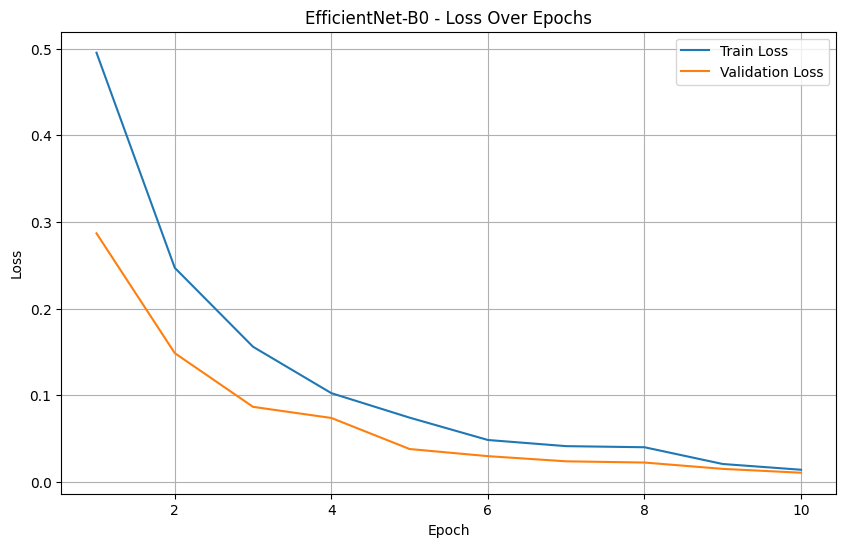

Training ConvNextTiny...
ConvNextTiny - Epoch 1/10 - Train Loss: 0.2596, Val Loss: 0.2422
ConvNextTiny - Epoch 2/10 - Train Loss: 0.2582, Val Loss: 0.2637
ConvNextTiny - Epoch 3/10 - Train Loss: 0.2575, Val Loss: 0.2372
ConvNextTiny - Epoch 4/10 - Train Loss: 0.2425, Val Loss: 0.2691
ConvNextTiny - Epoch 5/10 - Train Loss: 0.2503, Val Loss: 0.2376
ConvNextTiny - Epoch 6/10 - Train Loss: 0.2441, Val Loss: 0.2372
ConvNextTiny - Epoch 7/10 - Train Loss: 0.2484, Val Loss: 0.2368
ConvNextTiny - Epoch 8/10 - Train Loss: 0.2402, Val Loss: 0.2376
ConvNextTiny - Epoch 9/10 - Train Loss: 0.2370, Val Loss: 0.2383
ConvNextTiny - Epoch 10/10 - Train Loss: 0.2446, Val Loss: 0.2382


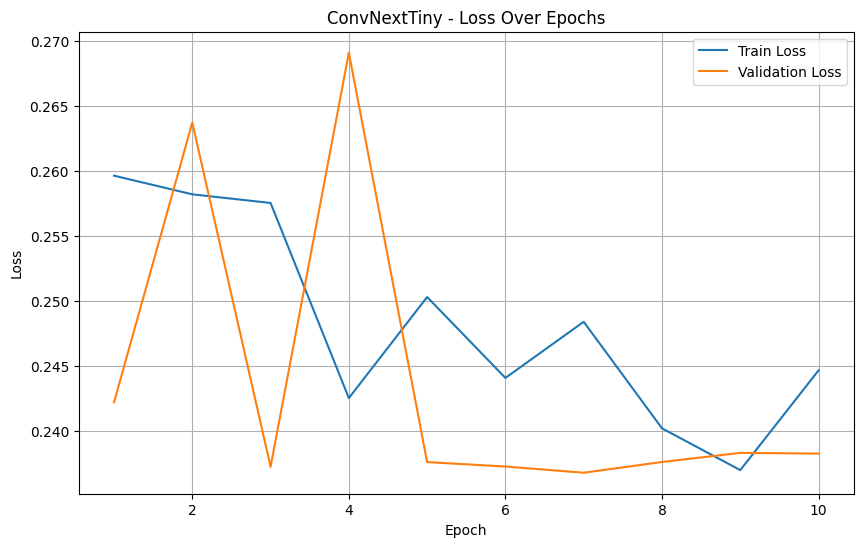

In [ ]:
from timm import create_model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")  # 이미지 열기

        if self.transform:
            image = self.transform(image)

        return image, label

# 데이터 경로 및 전처리
processed_dir = "/content/gdrive/MyDrive/Colab Notebooks/processed_videos"

# 파일명과 라벨 매핑 생성
labels = {f"{os.path.splitext(filename)[0]}_processed.jpg": label
          for filename, label in zip(train_df["filename"], train_df["label"])}

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize((160, 90)),  # 전처리된 해상도와 동일하게 설정
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
val_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# EfficientNet-B0 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# ConvNextTiny 모델 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)
convnext_tiny.to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer_efficientnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)

# 학습률 스케줄러 정의
scheduler_efficientnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode="min", factor=0.5, patience=2)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# 학습 및 평가 함수
def train_and_evaluate(model, optimizer, scheduler, train_loader, val_loader, num_epochs=10, model_name="Model"):
    for epoch in range(num_epochs):
        # 학습 단계
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)

        # 검증 단계
        val_loss = evaluate_model(model, val_loader)

        # 학습률 스케줄러 업데이트
        scheduler.step(val_loss)

        print(f"{model_name} - Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

def train_and_evaluate(
    model, optimizer, train_loader, val_loader, scheduler, num_epochs=10, model_name="Model"
):
    train_losses = []  # Train Loss 저장
    val_losses = []  # Validation Loss 저장

    for epoch in range(num_epochs):
        # 학습 단계
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)  # Train Loss 기록

        # 검증 단계
        val_loss = evaluate_model(model, val_loader)
        val_losses.append(val_loss)  # Validation Loss 기록

        # 학습률 스케줄러 업데이트
        scheduler.step(val_loss)

        print(f"{model_name} - Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # 학습 완료 후 Loss 그래프 출력
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.title(f"{model_name} - Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 모델 학습 호출
print("Training EfficientNet-B0...")
train_and_evaluate(efficientnet_b0, optimizer_efficientnet, train_loader, val_loader, scheduler_efficientnet, num_epochs=10, model_name="EfficientNet-B0")

print("Training ConvNextTiny...")
train_and_evaluate(convnext_tiny, optimizer_convnext, train_loader, val_loader, scheduler_convnext, num_epochs=10, model_name="ConvNextTiny")

Balanced dataset size: 110
label
0    55
1    55
Name: count, dtype: int64
Sample Labels in Batch: [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]
Epoch 1/10 - Train Loss: 0.7207, Val Loss: 0.6933
Epoch 2/10 - Train Loss: 0.6111, Val Loss: 0.6664
Epoch 3/10 - Train Loss: 0.5155, Val Loss: 0.6266
Epoch 4/10 - Train Loss: 0.4679, Val Loss: 0.5156
Epoch 5/10 - Train Loss: 0.3922, Val Loss: 0.3634
Epoch 6/10 - Train Loss: 0.3724, Val Loss: 0.2560
Epoch 7/10 - Train Loss: 0.2828, Val Loss: 0.1961
Epoch 8/10 - Train Loss: 0.2584, Val Loss: 0.1584
Epoch 9/10 - Train Loss: 0.2157, Val Loss: 0.1276
Epoch 10/10 - Train Loss: 0.1919, Val Loss: 0.1049


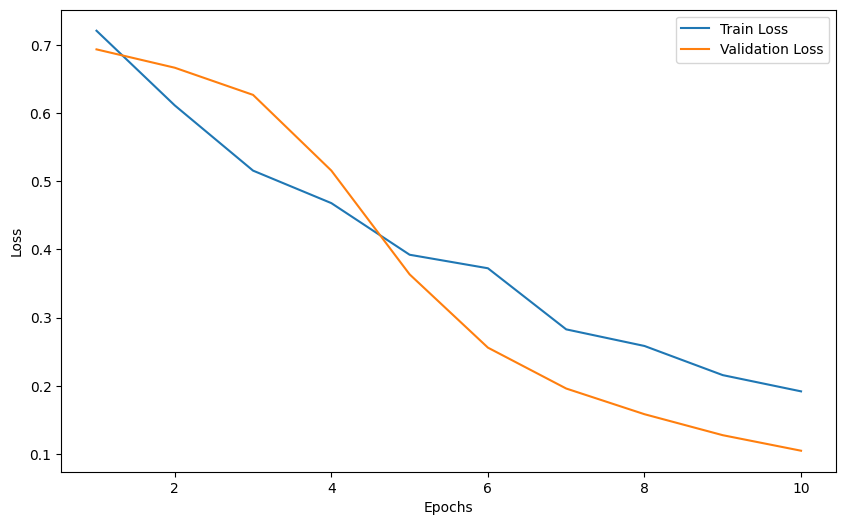

Test Metrics - Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1 Score: 100.00%


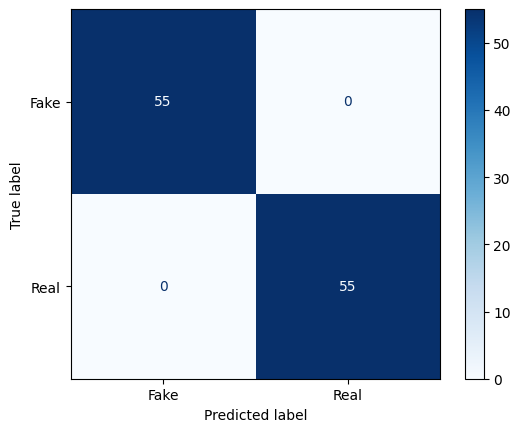

In [ ]:
import os
import torch
from timm import create_model
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 경로 및 전처리 설정
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"

# 데이터셋 균형화
# 가정: train_df에는 "filename"과 "label" 컬럼이 있음
fake_df = train_df[train_df['label'] == 0]
real_df = train_df[train_df['label'] == 1]

# Fake 데이터를 Real 데이터와 동일한 개수로 샘플링
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)

# Balanced 데이터셋 생성
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)
print(f"Balanced dataset size: {len(balanced_df)}")
print(balanced_df['label'].value_counts())

# 라벨 매핑 생성
balanced_labels = {f"{os.path.splitext(row['filename'])[0]}_processed.jpg": row['label']
                   for _, row in balanced_df.iterrows()}

# 이미지 전처리(transformations)
transform = transforms.Compose([
    transforms.Resize((160, 90)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 데이터셋 검증
for images, labels in train_loader:
    print("Sample Labels in Batch:", labels.tolist())
    break

# 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2)

# 학습 및 검증 함수
def train_and_evaluate(model, optimizer, train_loader, val_loader, scheduler, num_epochs=10):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        val_loss = evaluate_model(model, val_loader)
        val_losses.append(val_loss)

        scheduler.step(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 학습 호출
train_and_evaluate(efficientnet_b0, optimizer, train_loader, val_loader, scheduler, num_epochs=10)

# 테스트 함수
def test_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())

    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100
    print(f"Test Metrics - Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1 Score: {f1:.2f}%")
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"]).plot(cmap="Blues")
    plt.show()

# 테스트 호출
test_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
test_model(efficientnet_b0, test_loader)

Test data class distribution: {0.0: 22, 1.0: 22}
Training EfficientNet-B0...
EfficientNet-B0 - Epoch 1/10 - Train Loss: 0.7057, Val Loss: 0.6897
EfficientNet-B0 - Epoch 2/10 - Train Loss: 0.6403, Val Loss: 0.6842
EfficientNet-B0 - Epoch 3/10 - Train Loss: 0.5932, Val Loss: 0.6827
EfficientNet-B0 - Epoch 4/10 - Train Loss: 0.5546, Val Loss: 0.6722
EfficientNet-B0 - Epoch 5/10 - Train Loss: 0.5491, Val Loss: 0.6688
EfficientNet-B0 - Epoch 6/10 - Train Loss: 0.4967, Val Loss: 0.6597
EfficientNet-B0 - Epoch 7/10 - Train Loss: 0.4626, Val Loss: 0.6367
EfficientNet-B0 - Epoch 8/10 - Train Loss: 0.4406, Val Loss: 0.6047
EfficientNet-B0 - Epoch 9/10 - Train Loss: 0.4201, Val Loss: 0.5303
EfficientNet-B0 - Epoch 10/10 - Train Loss: 0.4146, Val Loss: 0.4457


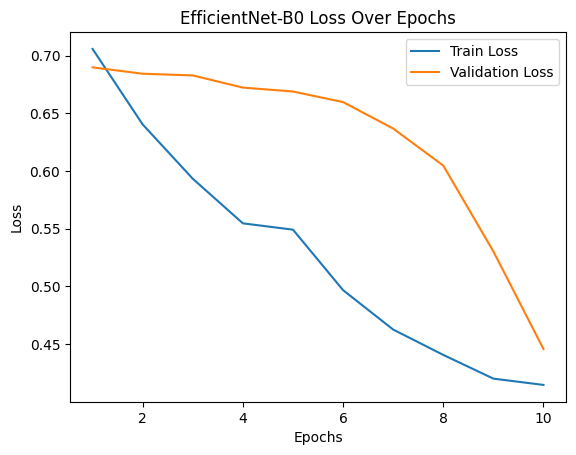

Training ConvNextTiny...
ConvNextTiny - Epoch 1/10 - Train Loss: 0.9216, Val Loss: 0.6780
ConvNextTiny - Epoch 2/10 - Train Loss: 0.7512, Val Loss: 0.6484
ConvNextTiny - Epoch 3/10 - Train Loss: 0.6771, Val Loss: 0.6170
ConvNextTiny - Epoch 4/10 - Train Loss: 0.6088, Val Loss: 0.5369
ConvNextTiny - Epoch 5/10 - Train Loss: 0.5310, Val Loss: 0.4333
ConvNextTiny - Epoch 6/10 - Train Loss: 0.4626, Val Loss: 0.3264
ConvNextTiny - Epoch 7/10 - Train Loss: 0.3348, Val Loss: 0.3555
ConvNextTiny - Epoch 8/10 - Train Loss: 0.3261, Val Loss: 0.2562
ConvNextTiny - Epoch 9/10 - Train Loss: 0.5220, Val Loss: 0.2517
ConvNextTiny - Epoch 10/10 - Train Loss: 0.3594, Val Loss: 0.2830


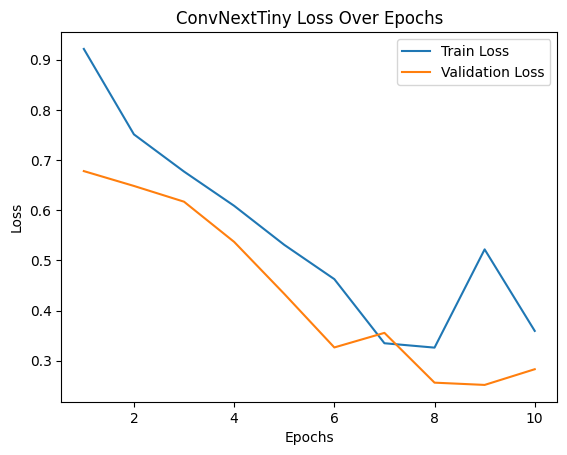

Testing EfficientNet-B0...
Test Loss: 0.4457
{'Accuracy (%)': 97.72727272727273, 'Precision (%)': 95.65217391304348, 'Recall (%)': 100.0, 'F1 Score (%)': 97.77777777777777}


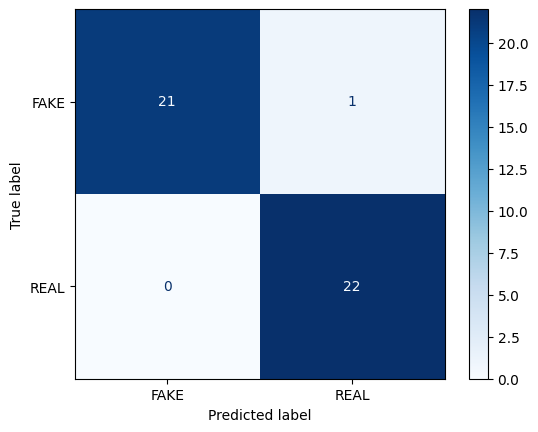

Testing ConvNextTiny...
Test Loss: 0.2830
{'Accuracy (%)': 86.36363636363636, 'Precision (%)': 94.44444444444444, 'Recall (%)': 77.27272727272727, 'F1 Score (%)': 85.0}


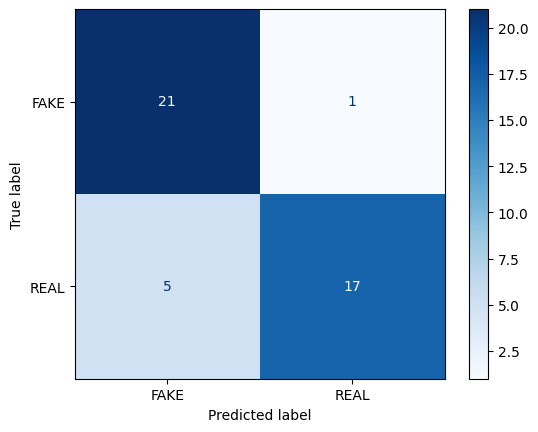

{'Accuracy (%)': 86.36363636363636,
 'Precision (%)': 94.44444444444444,
 'Recall (%)': 77.27272727272727,
 'F1 Score (%)': 85.0}

In [ ]:
import os
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from timm import create_model
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 데이터 경로 및 전처리
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"
labels = {f"{os.path.splitext(filename)[0]}_processed.jpg": label
          for filename, label in zip(train_df["filename"], train_df["label"])}

transform = transforms.Compose([
    transforms.Resize((160, 90)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
test_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 테스트 데이터 클래스 분포 확인
labels = [label for _, label in test_loader.dataset]
unique, counts = np.unique(labels, return_counts=True)
print("Test data class distribution:", dict(zip(unique, counts)))

# 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.5)  # Dropout 비율 증가
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)
convnext_tiny.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer_efficientnet = torch.optim.Adam(efficientnet_b0.parameters(), lr=5e-5, weight_decay=1e-5)
optimizer_convnext = torch.optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-5)

scheduler_efficientnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode="min", factor=0.5, patience=2)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# 학습 및 평가 함수
def train_and_evaluate(model, optimizer, train_loader, val_loader, scheduler, num_epochs=10, model_name="Model"):
    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        val_loss = evaluate_model(model, val_loader)
        val_losses.append(val_loss)
        scheduler.step(val_loss)

        print(f"{model_name} - Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # 학습 완료 후 Loss 그래프
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"{model_name} Loss Over Epochs")
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 성능 평가 함수
def test_model_with_metrics(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    test_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            preds = torch.round(torch.sigmoid(outputs))
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    metrics = {
        "Accuracy (%)": accuracy_score(y_true, y_pred) * 100,
        "Precision (%)": precision_score(y_true, y_pred, zero_division=0) * 100,
        "Recall (%)": recall_score(y_true, y_pred, zero_division=0) * 100,
        "F1 Score (%)": f1_score(y_true, y_pred, zero_division=0) * 100,
    }
    print(f"Test Loss: {test_loss / len(test_loader):.4f}")
    print(metrics)

    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=["FAKE", "REAL"], cmap="Blues")
    plt.show()
    return metrics

# 학습
print("Training EfficientNet-B0...")
train_and_evaluate(efficientnet_b0, optimizer_efficientnet, train_loader, test_loader, scheduler_efficientnet, model_name="EfficientNet-B0")

print("Training ConvNextTiny...")
train_and_evaluate(convnext_tiny, optimizer_convnext, train_loader, test_loader, scheduler_convnext, model_name="ConvNextTiny")

# 테스트
print("Testing EfficientNet-B0...")
test_model_with_metrics(efficientnet_b0, test_loader)

print("Testing ConvNextTiny...")
test_model_with_metrics(convnext_tiny, test_loader)

# 5. 테스트 코드
- 학습 완료 모델을 사용하여 테스트 데이터에 대한 예측 수행 및 결과를 평가

In [ ]:
import torch
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# 테스트 함수
def test_model(model, test_loader):
    """
    모델 테스트 함수
    Args:
        model: 테스트할 모델
        test_loader: 테스트 데이터 로더
    Returns:
        metrics: 테스트 성능 지표 딕셔너리
    """
    model.eval()
    test_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 이진 분류 결과
            all_preds.extend(preds.flatten())
            all_labels.extend(labels.cpu().numpy().flatten())

    test_loss /= len(test_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)

    metrics = {
        "Loss": test_loss,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
    }

    return metrics

# 테스트 데이터 로더 생성
test_dataset = ProcessedDataset(processed_dir, labels, transform=transform)  # 동일한 transform 사용
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# EfficientNet-B0 테스트
print("Testing EfficientNet-B0...")
efficientnet_metrics = test_model(efficientnet_b0, test_loader)
print("EfficientNet-B0 Test Metrics:")
for metric, value in efficientnet_metrics.items():
    print(f"{metric}: {value:.4f}")

# ConvNextTiny 테스트
print("Testing ConvNextTiny...")
convnext_metrics = test_model(convnext_tiny, test_loader)
print("ConvNextTiny Test Metrics:")
for metric, value in convnext_metrics.items():
    print(f"{metric}: {value:.4f}")

Testing EfficientNet-B0...
EfficientNet-B0 Test Metrics:
Loss: 0.6307
Accuracy: 0.7000
F1 Score: 0.6957
Precision: 0.7059
Recall: 0.6857
Testing ConvNextTiny...
ConvNextTiny Test Metrics:
Loss: 0.6825
Accuracy: 0.5286
F1 Score: 0.2326
Precision: 0.6250
Recall: 0.1429


In [ ]:
import torch
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# 테스트 함수
def test_model(model, test_loader):
    """
    모델 테스트 함수
    Args:
        model: 테스트할 모델
        test_loader: 테스트 데이터 로더
    Returns:
        metrics: 테스트 성능 지표 딕셔너리
    """
    model.eval()
    test_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            preds = (torch.sigmoid(outputs).cpu().numpy() > 0.5).astype(int)  # 이진 분류 결과
            all_preds.extend(preds.flatten())
            all_labels.extend(labels.cpu().numpy().flatten())

    test_loss /= len(test_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)

    metrics = {
        "Loss": test_loss,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
    }

    return metrics

# 테스트 데이터 로더 생성
# 테스트 데이터의 경우 balanced_df를 사용할 경우 동일한 데이터로 조정 필요
test_dataset = ProcessedDataset(
    processed_dir,
    labels,  # 동일한 라벨 매핑
    transform=transform,  # 동일한 전처리 적용
)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# EfficientNet-B0 테스트
print("Testing EfficientNet-B0...")
efficientnet_metrics = test_model(efficientnet_b0, test_loader)
print("EfficientNet-B0 Test Metrics:")
for metric, value in efficientnet_metrics.items():
    print(f"{metric}: {value:.4f}")

# ConvNextTiny 테스트
print("Testing ConvNextTiny...")
convnext_metrics = test_model(convnext_tiny, test_loader)
print("ConvNextTiny Test Metrics:")
for metric, value in convnext_metrics.items():
    print(f"{metric}: {value:.4f}")

Testing EfficientNet-B0...
EfficientNet-B0 Test Metrics:
Loss: 0.6359
Accuracy: 0.6571
F1 Score: 0.6250
Precision: 0.6897
Recall: 0.5714
Testing ConvNextTiny...
ConvNextTiny Test Metrics:
Loss: 0.7069
Accuracy: 0.5429
F1 Score: 0.2000
Precision: 0.8000
Recall: 0.1143


In [ ]:
# 성능 매트릭 계산 함수
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def calculate_metrics(y_true, y_pred):
    """
    성능 매트릭 계산
    Args:
        y_true (list): 실제 레이블
        y_pred (list): 예측 레이블
    Returns:
        dict: Accuracy, Precision, Recall, F1 Score
    """
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100
    return {"Accuracy (%)": accuracy, "Precision (%)": precision, "Recall (%)": recall, "F1 Score (%)": f1}

def plot_confusion_matrix(y_true, y_pred, class_names=["FAKE", "REAL"]):
    """
    혼동 행렬 시각화
    Args:
        y_true (list): 실제 레이블
        y_pred (list): 예측 레이블
        class_names (list): 클래스 이름
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# 테스트 데이터에서 모델 평가
def test_model_with_metrics(model, test_loader):
    """
    테스트 데이터에서 모델 평가
    Args:
        model: 학습된 모델
        test_loader: 테스트 데이터 로더
    """
    model.eval()
    y_true = []
    y_pred = []
    test_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            preds = torch.round(torch.sigmoid(outputs))
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    # 성능 매트릭 계산
    metrics = calculate_metrics(y_true, y_pred)

    # 테스트 손실 출력
    test_loss /= len(test_loader)
    print(f"Test Loss: {test_loss:.4f}")

    # 성능 매트릭 출력
    print("Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")

    # 혼동 행렬 시각화
    plot_confusion_matrix(y_true, y_pred, class_names=["FAKE", "REAL"])

    return metrics

Testing EfficientNet-B0...
Test Loss: 0.0201
Performance Metrics:
Accuracy (%): 99.30
Precision (%): 90.16
Recall (%): 100.00
F1 Score (%): 94.83


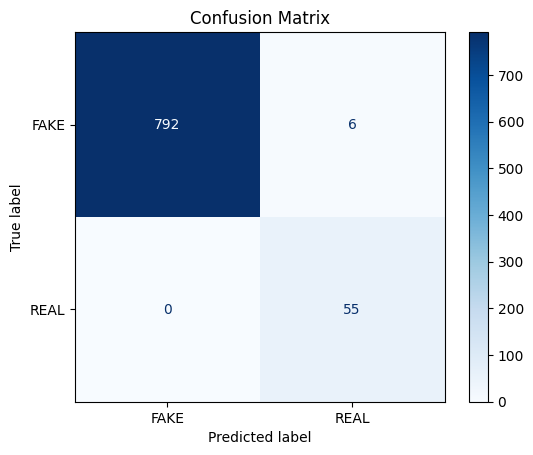

Testing ConvNextTiny...
Test Loss: 0.2309
Performance Metrics:
Accuracy (%): 93.55
Precision (%): 0.00
Recall (%): 0.00
F1 Score (%): 0.00


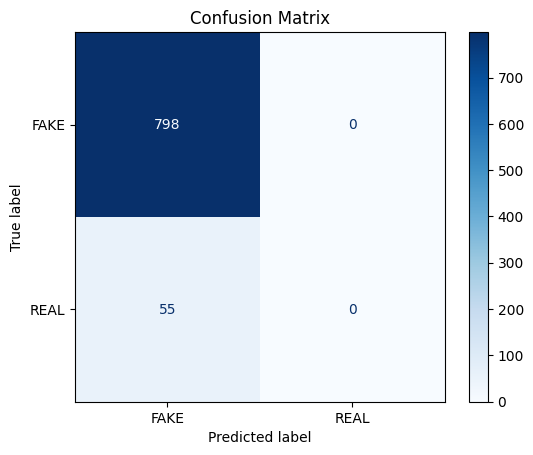


EfficientNet-B0 Metrics:
Accuracy (%): 99.30
Precision (%): 90.16
Recall (%): 100.00
F1 Score (%): 94.83

ConvNextTiny Metrics:
Accuracy (%): 93.55
Precision (%): 0.00
Recall (%): 0.00
F1 Score (%): 0.00


In [ ]:
# 테스트 수행
print("Testing EfficientNet-B0...")
efficientnet_metrics = test_model_with_metrics(efficientnet_b0, test_loader)

print("Testing ConvNextTiny...")
convnext_metrics = test_model_with_metrics(convnext_tiny, test_loader)

# 결과 출력
print("\nEfficientNet-B0 Metrics:")
for metric, value in efficientnet_metrics.items():
    print(f"{metric}: {value:.2f}")

print("\nConvNextTiny Metrics:")
for metric, value in convnext_metrics.items():
    print(f"{metric}: {value:.2f}")

In [ ]:
def test_model_with_metrics(model, test_loader):
    """
    테스트 데이터에서 모델 평가
    """
    model.eval()
    y_true = []
    y_pred = []
    test_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            preds = torch.round(torch.sigmoid(outputs)).cpu().numpy().astype(int)  # 정수형 변환
            y_pred.extend(preds.flatten())  # 1D 배열로 확장
            y_true.extend(labels.cpu().numpy().flatten())  # 1D 배열로 확장

    # 성능 매트릭 계산
    metrics = calculate_metrics(y_true, y_pred)

    # 테스트 손실 출력
    test_loss /= len(test_loader)
    print(f"Test Loss: {test_loss:.4f}")

    # 성능 매트릭 출력
    print("Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")

    # 혼동 행렬 시각화
    plot_confusion_matrix(y_true, y_pred, class_names=["FAKE", "REAL"])

    # 개별 예측 결과 로깅
    for idx, (true_label, predicted_label) in enumerate(zip(y_true, y_pred)):
        print(f"Sample {idx}: True Label = {true_label}, Predicted Label = {predicted_label}")

    return metrics

Testing EfficientNet-B0...
Test Loss: 0.1049
Performance Metrics:
Accuracy (%): 100.00
Precision (%): 100.00
Recall (%): 100.00
F1 Score (%): 100.00


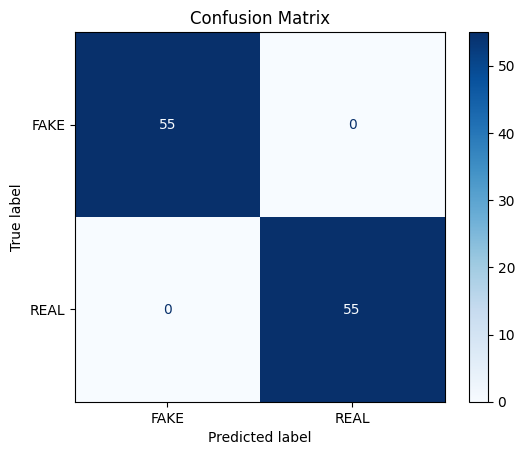

Sample 0: True Label = 0.0, Predicted Label = 0
Sample 1: True Label = 1.0, Predicted Label = 1
Sample 2: True Label = 1.0, Predicted Label = 1
Sample 3: True Label = 0.0, Predicted Label = 0
Sample 4: True Label = 0.0, Predicted Label = 0
Sample 5: True Label = 0.0, Predicted Label = 0
Sample 6: True Label = 1.0, Predicted Label = 1
Sample 7: True Label = 1.0, Predicted Label = 1
Sample 8: True Label = 0.0, Predicted Label = 0
Sample 9: True Label = 1.0, Predicted Label = 1
Sample 10: True Label = 0.0, Predicted Label = 0
Sample 11: True Label = 0.0, Predicted Label = 0
Sample 12: True Label = 1.0, Predicted Label = 1
Sample 13: True Label = 0.0, Predicted Label = 0
Sample 14: True Label = 1.0, Predicted Label = 1
Sample 15: True Label = 0.0, Predicted Label = 0
Sample 16: True Label = 0.0, Predicted Label = 0
Sample 17: True Label = 0.0, Predicted Label = 0
Sample 18: True Label = 0.0, Predicted Label = 0
Sample 19: True Label = 1.0, Predicted Label = 1
Sample 20: True Label = 1.0, P

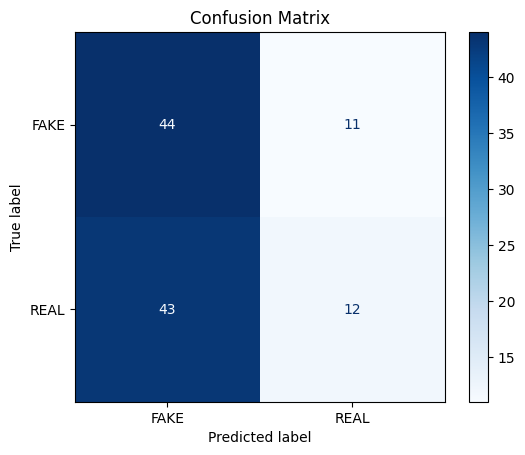

Sample 0: True Label = 0.0, Predicted Label = 0
Sample 1: True Label = 1.0, Predicted Label = 0
Sample 2: True Label = 1.0, Predicted Label = 0
Sample 3: True Label = 0.0, Predicted Label = 0
Sample 4: True Label = 0.0, Predicted Label = 0
Sample 5: True Label = 0.0, Predicted Label = 0
Sample 6: True Label = 1.0, Predicted Label = 0
Sample 7: True Label = 1.0, Predicted Label = 0
Sample 8: True Label = 0.0, Predicted Label = 0
Sample 9: True Label = 1.0, Predicted Label = 1
Sample 10: True Label = 0.0, Predicted Label = 0
Sample 11: True Label = 0.0, Predicted Label = 0
Sample 12: True Label = 1.0, Predicted Label = 0
Sample 13: True Label = 0.0, Predicted Label = 0
Sample 14: True Label = 1.0, Predicted Label = 0
Sample 15: True Label = 0.0, Predicted Label = 0
Sample 16: True Label = 0.0, Predicted Label = 0
Sample 17: True Label = 0.0, Predicted Label = 0
Sample 18: True Label = 0.0, Predicted Label = 0
Sample 19: True Label = 1.0, Predicted Label = 0
Sample 20: True Label = 1.0, P

In [ ]:
import json

def test_and_print_metrics(model, model_name, test_loader):
    """
    모델 테스트 및 결과 출력
    Args:
        model: 테스트할 모델
        model_name: 모델 이름
        test_loader: 테스트 데이터 로더
    """
    print(f"Testing {model_name}...")
    metrics = test_model_with_metrics(model, test_loader)
    print(f"\n{model_name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")

    # 결과 저장
    results_path = f"{model_name}_metrics.json"
    with open(results_path, "w") as f:
        json.dump(metrics, f, indent=4)
    print(f"{model_name} metrics saved to {results_path}")

    return metrics

# 테스트 수행 및 결과 저장
efficientnet_metrics = test_and_print_metrics(efficientnet_b0, "EfficientNet-B0", test_loader)
convnext_metrics = test_and_print_metrics(convnext_tiny, "ConvNextTiny", test_loader)

In [ ]:
import pandas as pd
from sklearn.utils import resample

# 기존 데이터프레임 로드 (예: df)
fake_df = df[df['label'] == 0]
real_df = df[df['label'] == 1]

# Fake 데이터를 Real 데이터와 동일한 개수로 샘플링
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)

# Fake와 Real 데이터를 결합
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# 업데이트된 데이터 크기 출력
print(f"Balanced dataset size: {len(balanced_df)}")
print(balanced_df['label'].value_counts())

Balanced dataset size: 172
label
1    86
0    86
Name: count, dtype: int64


Data Distribution:
label
1    35
0    35
Name: count, dtype: int64


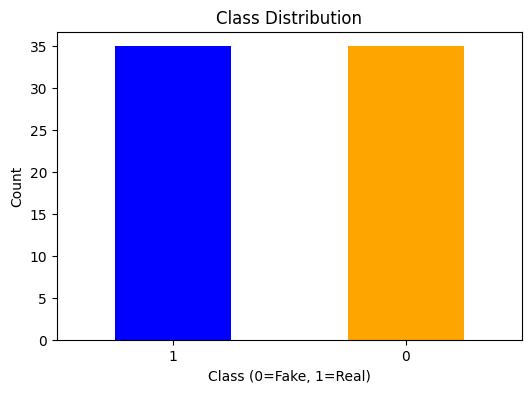

In [ ]:
import pandas as pd

# 기존 데이터프레임(df) 사용
# 데이터프레임 df는 'label' 컬럼이 0(Fake), 1(Real)로 라벨이 되어 있다고 가정합니다.
label_counts = balanced_df['label'].value_counts()
print("Data Distribution:")
print(label_counts)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class (0=Fake, 1=Real)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Training EfficientNet-B0...
EfficientNet-B0 - Epoch 1/10 - Train Loss: 0.7054, Val Loss: 0.6831
EfficientNet-B0 - Epoch 2/10 - Train Loss: 0.5854, Val Loss: 0.6750
EfficientNet-B0 - Epoch 3/10 - Train Loss: 0.5282, Val Loss: 0.6884
EfficientNet-B0 - Epoch 4/10 - Train Loss: 0.4835, Val Loss: 0.6927
EfficientNet-B0 - Epoch 5/10 - Train Loss: 0.4031, Val Loss: 0.6975
EfficientNet-B0 - Epoch 6/10 - Train Loss: 0.3662, Val Loss: 0.7023
EfficientNet-B0 - Epoch 7/10 - Train Loss: 0.3764, Val Loss: 0.7087
EfficientNet-B0 - Epoch 8/10 - Train Loss: 0.3172, Val Loss: 0.7373
EfficientNet-B0 - Epoch 9/10 - Train Loss: 0.3207, Val Loss: 0.8083
EfficientNet-B0 - Epoch 10/10 - Train Loss: 0.3157, Val Loss: 0.8538


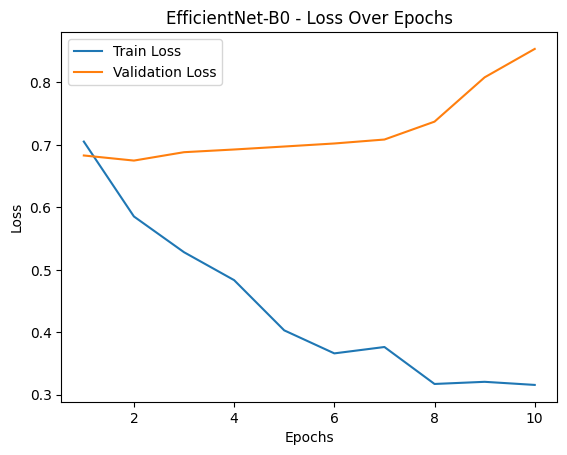

Testing EfficientNet-B0...
Test Loss: 0.4095
Performance Metrics:
Accuracy (%): 82.86
Precision (%): 82.86
Recall (%): 82.86
F1 Score (%): 82.86


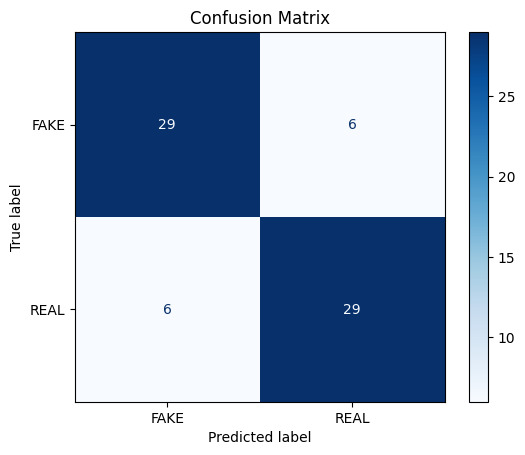

Training ConvNextTiny...
ConvNextTiny - Epoch 1/10 - Train Loss: 0.6858, Val Loss: 0.7568
ConvNextTiny - Epoch 2/10 - Train Loss: 0.7633, Val Loss: 0.6850
ConvNextTiny - Epoch 3/10 - Train Loss: 0.7330, Val Loss: 0.7110
ConvNextTiny - Epoch 4/10 - Train Loss: 0.7157, Val Loss: 0.7233
ConvNextTiny - Epoch 5/10 - Train Loss: 0.7008, Val Loss: 0.7009
ConvNextTiny - Epoch 6/10 - Train Loss: 0.6991, Val Loss: 0.7150
ConvNextTiny - Epoch 7/10 - Train Loss: 0.6875, Val Loss: 0.7098
ConvNextTiny - Epoch 8/10 - Train Loss: 0.6808, Val Loss: 0.7133
ConvNextTiny - Epoch 9/10 - Train Loss: 0.6871, Val Loss: 0.7269
ConvNextTiny - Epoch 10/10 - Train Loss: 0.6670, Val Loss: 0.7524


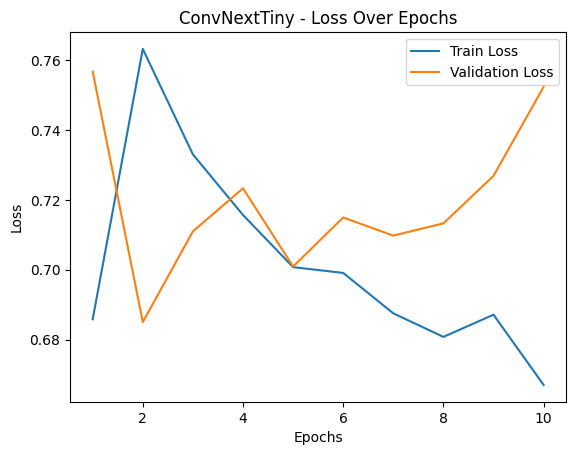

Testing ConvNextTiny...
Test Loss: 0.6877
Performance Metrics:
Accuracy (%): 55.71
Precision (%): 53.45
Recall (%): 88.57
F1 Score (%): 66.67


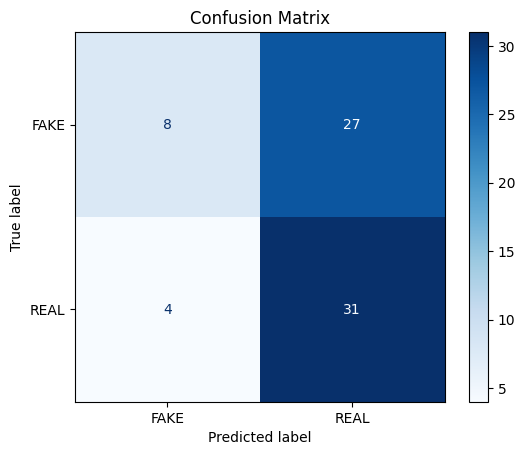

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from PIL import Image
import matplotlib.pyplot as plt
import json

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = [f for f in os.listdir(image_dir) if f in labels]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 경로 및 데이터 설정
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"

# 파일명과 라벨 매핑 생성
labels = {f"{os.path.splitext(filename)[0]}_processed.jpg": label
          for filename, label in zip(train_df["filename"], train_df["label"])}

# 데이터셋 분리
image_files = list(labels.keys())
train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

train_labels = {file: labels[file] for file in train_files}
val_labels = {file: labels[file] for file in val_files}

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, train_labels, transform=transform)
val_dataset = ProcessedDataset(processed_dir, val_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# EfficientNet-B0 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

# ConvNextTiny 모델 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)
convnext_tiny.to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer_efficientnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)

# 학습률 스케줄러 정의
scheduler_efficientnet = optim.lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode="min", factor=0.5, patience=2)
scheduler_convnext = optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# 성능 매트릭 계산 함수
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=1) * 100
    recall = recall_score(y_true, y_pred, zero_division=1) * 100
    f1 = f1_score(y_true, y_pred, zero_division=1) * 100
    return {"Accuracy (%)": accuracy, "Precision (%)": precision, "Recall (%)": recall, "F1 Score (%)": f1}

def plot_confusion_matrix(y_true, y_pred, class_names=["FAKE", "REAL"]):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# 학습 및 검증 함수
def train_and_evaluate(model, optimizer, scheduler, train_loader, val_loader, num_epochs=10, model_name="Model"):
    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device).unsqueeze(1)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        scheduler.step(val_loss)

        print(f"{model_name} - Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.title(f"{model_name} - Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# 테스트 함수
def test_model_with_metrics(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            preds = torch.round(torch.sigmoid(outputs))
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    metrics = calculate_metrics(y_true, y_pred)
    print(f"Test Loss: {test_loss / len(test_loader):.4f}")
    print("Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    plot_confusion_matrix(y_true, y_pred)

# 데이터 로더 생성
test_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 학습 및 평가 실행
print("Training EfficientNet-B0...")
train_and_evaluate(efficientnet_b0, optimizer_efficientnet, scheduler_efficientnet, train_loader, val_loader, num_epochs=10, model_name="EfficientNet-B0")

print("Testing EfficientNet-B0...")
test_model_with_metrics(efficientnet_b0, test_loader)

print("Training ConvNextTiny...")
train_and_evaluate(convnext_tiny, optimizer_convnext, scheduler_convnext, train_loader, val_loader, num_epochs=10, model_name="ConvNextTiny")

print("Testing ConvNextTiny...")
test_model_with_metrics(convnext_tiny, test_loader)

Training EfficientNet-B0...


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


EfficientNet-B0 - Epoch 1/10 - Train Loss: 0.9477, Val Loss: 0.9641
EfficientNet-B0 - Epoch 2/10 - Train Loss: 0.8665, Val Loss: 0.9206
EfficientNet-B0 - Epoch 3/10 - Train Loss: 0.8168, Val Loss: 0.9061
EfficientNet-B0 - Epoch 4/10 - Train Loss: 0.7969, Val Loss: 0.8990
EfficientNet-B0 - Epoch 5/10 - Train Loss: 0.7641, Val Loss: 0.8807
EfficientNet-B0 - Epoch 6/10 - Train Loss: 0.7553, Val Loss: 0.7945
EfficientNet-B0 - Epoch 7/10 - Train Loss: 0.7232, Val Loss: 0.7196
EfficientNet-B0 - Epoch 8/10 - Train Loss: 0.6909, Val Loss: 0.6665
EfficientNet-B0 - Epoch 9/10 - Train Loss: 0.6969, Val Loss: 0.6390
EfficientNet-B0 - Epoch 10/10 - Train Loss: 0.6573, Val Loss: 0.5900


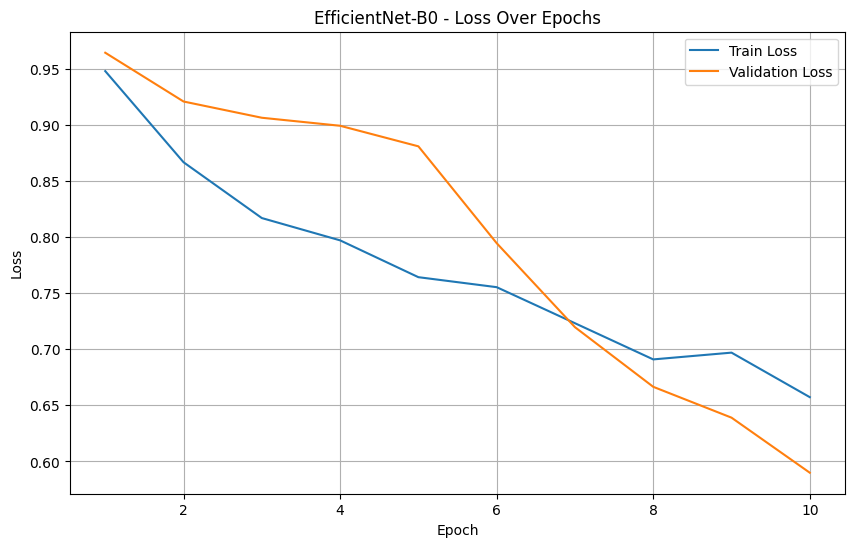

Training ConvNextTiny...
ConvNextTiny - Epoch 1/10 - Train Loss: 0.8486, Val Loss: 0.7984
ConvNextTiny - Epoch 2/10 - Train Loss: 0.9782, Val Loss: 0.9073
ConvNextTiny - Epoch 3/10 - Train Loss: 0.8976, Val Loss: 0.8513
ConvNextTiny - Epoch 4/10 - Train Loss: 0.8474, Val Loss: 0.8752
ConvNextTiny - Epoch 5/10 - Train Loss: 0.8907, Val Loss: 0.8427
ConvNextTiny - Epoch 6/10 - Train Loss: 0.8497, Val Loss: 0.8384
ConvNextTiny - Epoch 7/10 - Train Loss: 0.8568, Val Loss: 0.8318
ConvNextTiny - Epoch 8/10 - Train Loss: 0.8424, Val Loss: 0.8390
ConvNextTiny - Epoch 9/10 - Train Loss: 0.8445, Val Loss: 0.8387
ConvNextTiny - Epoch 10/10 - Train Loss: 0.8384, Val Loss: 0.8352


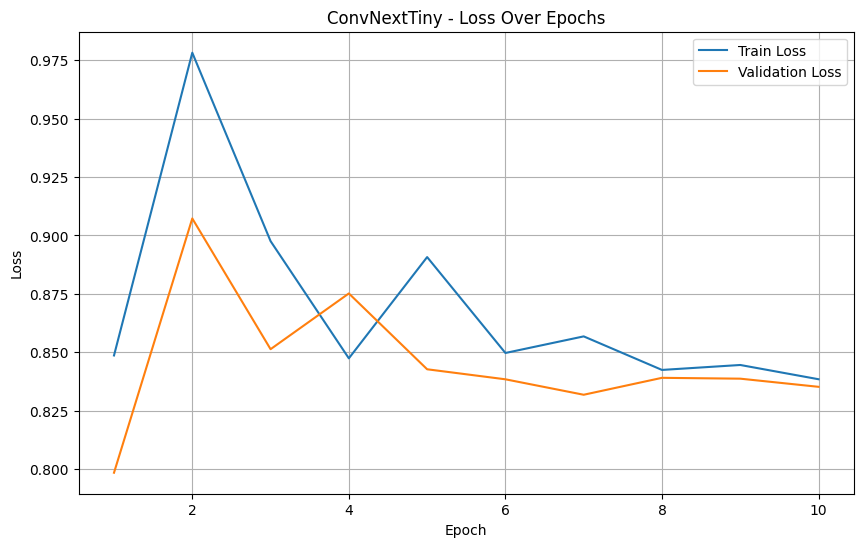

Testing EfficientNet-B0...


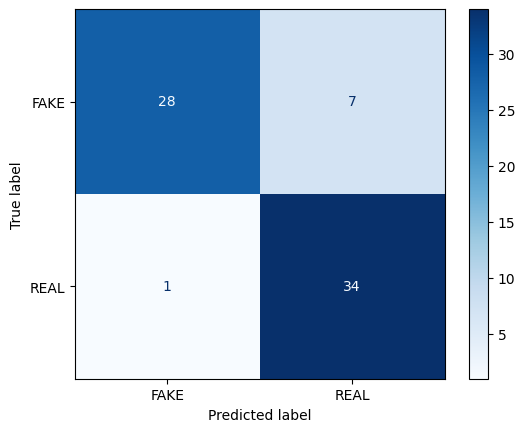

{'Accuracy (%)': 88.57142857142857, 'Precision (%)': 82.92682926829268, 'Recall (%)': 97.14285714285714, 'F1 Score (%)': 89.47368421052632}
Testing ConvNextTiny...


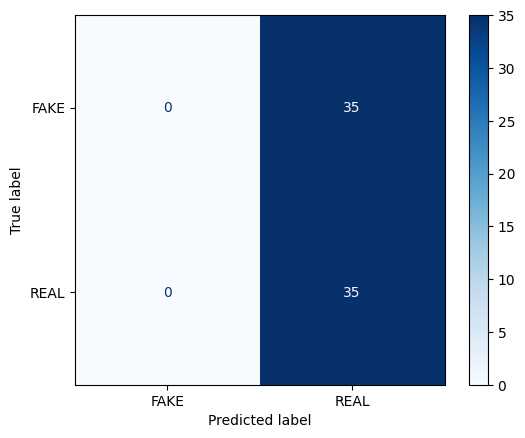

{'Accuracy (%)': 50.0, 'Precision (%)': 50.0, 'Recall (%)': 100.0, 'F1 Score (%)': 66.66666666666666}


In [ ]:
# 필요한 라이브러리 임포트
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from timm import create_model
from PIL import Image
import os
import matplotlib.pyplot as plt

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.float32)

# 경로 설정
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"

# 파일명과 라벨 매핑 생성
# 예시: labels = {"image1.jpg": 0, "image2.jpg": 1}
#labels = {"example_processed.jpg": 0}  # 여기에 실제 라벨 정보를 추가

# 파일명과 라벨 매핑 생성
labels = {f"{os.path.splitext(filename)[0]}_processed.jpg": label
          for filename, label in zip(train_df["filename"], train_df["label"])}

# 데이터 증강 및 변환 설정
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
val_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 모델 정의 (EfficientNet-B0)
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

# 모델 정의 (ConvNextTiny)
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)

# 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)
convnext_tiny.to(device)

# 손실 함수 및 옵티마이저 정의 (가중치 적용)
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([1.5]).to(device))
optimizer_efficientnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)

# 학습률 스케줄러 정의
scheduler_efficientnet = torch.optim.lr_scheduler.StepLR(optimizer_efficientnet, step_size=5, gamma=0.5)
scheduler_convnext = torch.optim.lr_scheduler.StepLR(optimizer_convnext, step_size=5, gamma=0.5)

# 학습 및 평가 함수
def train_and_evaluate(model, optimizer, scheduler, train_loader, val_loader, num_epochs=10, model_name="Model"):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        # 학습 단계
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # 검증 단계
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        scheduler.step(val_loss)
        print(f"{model_name} - Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Loss 그래프 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.title(f"{model_name} - Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

# 학습 수행
print("Training EfficientNet-B0...")
train_and_evaluate(efficientnet_b0, optimizer_efficientnet, scheduler_efficientnet, train_loader, val_loader, num_epochs=10, model_name="EfficientNet-B0")

print("Training ConvNextTiny...")
train_and_evaluate(convnext_tiny, optimizer_convnext, scheduler_convnext, train_loader, val_loader, num_epochs=10, model_name="ConvNextTiny")

# 테스트 함수
def test_model_with_metrics(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            preds = torch.round(torch.sigmoid(outputs))
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.cpu().numpy())
    metrics = {
        "Accuracy (%)": accuracy_score(y_true, y_pred) * 100,
        "Precision (%)": precision_score(y_true, y_pred, zero_division=0) * 100,
        "Recall (%)": recall_score(y_true, y_pred, zero_division=0) * 100,
        "F1 Score (%)": f1_score(y_true, y_pred, zero_division=0) * 100,
    }
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["FAKE", "REAL"]).plot(cmap=plt.cm.Blues)
    plt.show()
    return metrics

# 테스트 데이터 로더 생성
test_dataset = ProcessedDataset(processed_dir, labels, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 모델 테스트
print("Testing EfficientNet-B0...")
metrics_efficientnet = test_model_with_metrics(efficientnet_b0, test_loader)
print(metrics_efficientnet)

print("Testing ConvNextTiny...")
metrics_convnext = test_model_with_metrics(convnext_tiny, test_loader)
print(metrics_convnext)

Balanced dataset size: 70
label
1    35
0    35
Name: count, dtype: int64
Epoch 1/10 - Train Loss: 0.7127, Val Loss: 0.6976
Epoch 2/10 - Train Loss: 0.6292, Val Loss: 0.6873
Epoch 3/10 - Train Loss: 0.5472, Val Loss: 0.6624
Epoch 4/10 - Train Loss: 0.4779, Val Loss: 0.6128
Epoch 5/10 - Train Loss: 0.4329, Val Loss: 0.5222
Epoch 6/10 - Train Loss: 0.3602, Val Loss: 0.3784
Epoch 7/10 - Train Loss: 0.3211, Val Loss: 0.2686
Epoch 8/10 - Train Loss: 0.3355, Val Loss: 0.2031
Epoch 9/10 - Train Loss: 0.2843, Val Loss: 0.1626
Epoch 10/10 - Train Loss: 0.2141, Val Loss: 0.1334


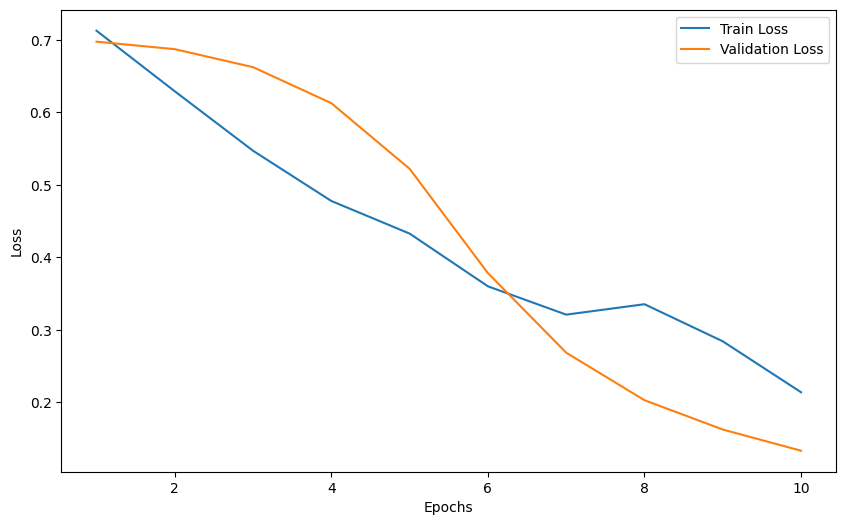

Test Metrics - Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1 Score: 100.00%


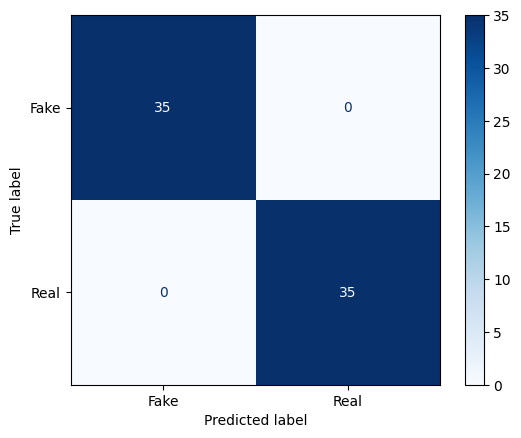

In [ ]:
import os
import torch
from timm import create_model
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 경로 및 전처리 설정
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"

# 데이터셋 로드 및 균형화
fake_df = train_df[train_df['label'] == 0]
real_df = train_df[train_df['label'] == 1]
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# 라벨 매핑 생성
balanced_labels = {
    f"{os.path.splitext(row['filename'])[0]}_processed.jpg": row['label']
    for _, row in balanced_df.iterrows()
}

print(f"Balanced dataset size: {len(balanced_df)}")
print(balanced_df['label'].value_counts())

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize((160, 90)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

# 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.fc = nn.Linear(self.backbone.num_features, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

# 모델 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomEfficientNetB0(pretrained=True).to(device)

# 손실 함수, 옵티마이저, 스케줄러 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.5, patience=2)

# 학습 및 검증 함수
def train_and_evaluate(model, optimizer, train_loader, val_loader, scheduler, num_epochs=10):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        val_loss = evaluate_model(model, val_loader)
        val_losses.append(val_loss)

        scheduler.step(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # 손실 그래프 출력
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 학습 호출
train_and_evaluate(model, optimizer, train_loader, val_loader, scheduler, num_epochs=10)

# 테스트 함수
def test_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())

    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100
    print(f"Test Metrics - Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1 Score: {f1:.2f}%")
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"]).plot(cmap="Blues")
    plt.show()

# 테스트 호출
test_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)
test_model(model, test_loader)

Balanced dataset size: 110
label
0    55
1    55
Name: count, dtype: int64
Training EfficientNet-B0...
EfficientNet-B0 - Epoch 1/10 - Train Loss: 0.6928, Val Loss: 0.7085
EfficientNet-B0 - Epoch 2/10 - Train Loss: 0.5982, Val Loss: 0.6815
EfficientNet-B0 - Epoch 3/10 - Train Loss: 0.5199, Val Loss: 0.6135
EfficientNet-B0 - Epoch 4/10 - Train Loss: 0.4488, Val Loss: 0.4780
EfficientNet-B0 - Epoch 5/10 - Train Loss: 0.3987, Val Loss: 0.3217
EfficientNet-B0 - Epoch 6/10 - Train Loss: 0.3229, Val Loss: 0.2285
EfficientNet-B0 - Epoch 7/10 - Train Loss: 0.2864, Val Loss: 0.1714
EfficientNet-B0 - Epoch 8/10 - Train Loss: 0.2676, Val Loss: 0.1365
EfficientNet-B0 - Epoch 9/10 - Train Loss: 0.2207, Val Loss: 0.1066
EfficientNet-B0 - Epoch 10/10 - Train Loss: 0.1993, Val Loss: 0.0803


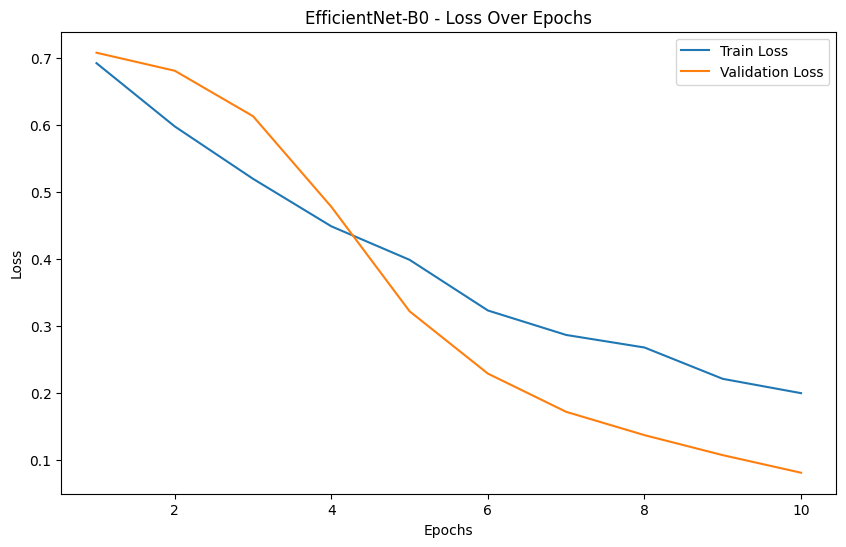

Training ConvNextTiny...
ConvNextTiny - Epoch 1/10 - Train Loss: 0.7557, Val Loss: 0.7032
ConvNextTiny - Epoch 2/10 - Train Loss: 0.7036, Val Loss: 0.6934
ConvNextTiny - Epoch 3/10 - Train Loss: 0.7055, Val Loss: 0.6920
ConvNextTiny - Epoch 4/10 - Train Loss: 0.7232, Val Loss: 0.6991
ConvNextTiny - Epoch 5/10 - Train Loss: 0.6892, Val Loss: 0.6955
ConvNextTiny - Epoch 6/10 - Train Loss: 0.6985, Val Loss: 0.6954
ConvNextTiny - Epoch 7/10 - Train Loss: 0.6936, Val Loss: 0.6913
ConvNextTiny - Epoch 8/10 - Train Loss: 0.6924, Val Loss: 0.6908
ConvNextTiny - Epoch 9/10 - Train Loss: 0.6954, Val Loss: 0.6865
ConvNextTiny - Epoch 10/10 - Train Loss: 0.6880, Val Loss: 0.6821


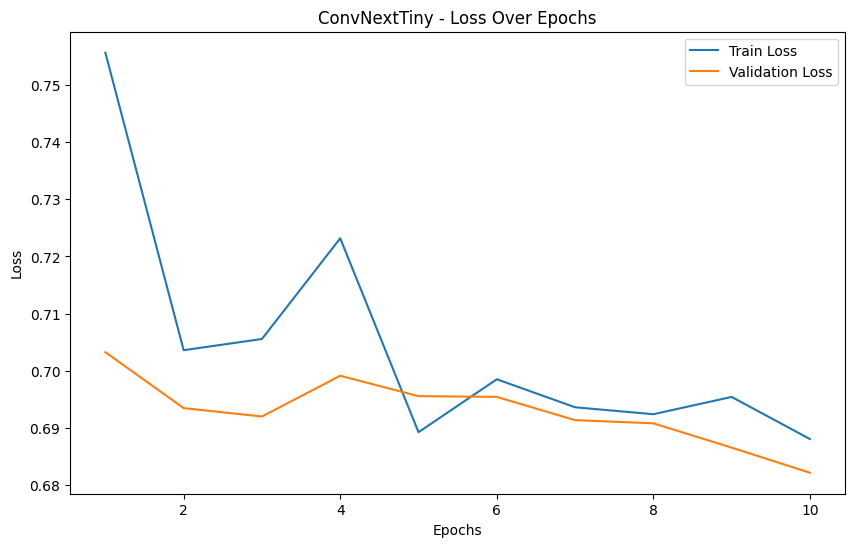

Testing EfficientNet-B0...
EfficientNet-B0 Test Metrics - Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1 Score: 100.00%


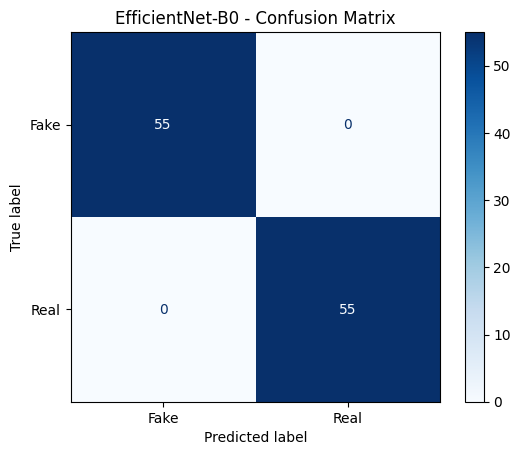

Testing ConvNextTiny...
ConvNextTiny Test Metrics - Accuracy: 56.36%, Precision: 53.61%, Recall: 94.55%, F1 Score: 68.42%


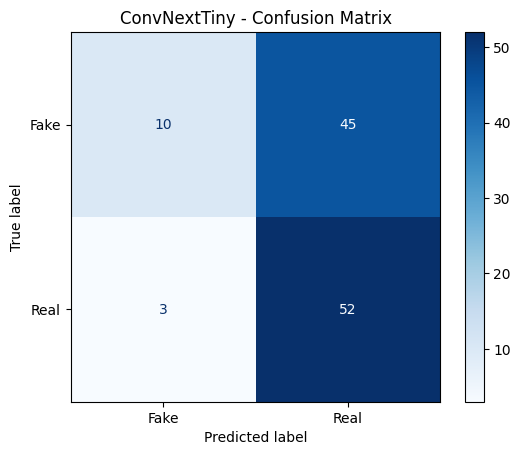

In [ ]:
import os
import torch
from timm import create_model
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 경로 및 전처리 설정
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"

# 데이터셋 로드 및 균형화
fake_df = train_df[train_df['label'] == 0]
real_df = train_df[train_df['label'] == 1]
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# 라벨 매핑 생성
balanced_labels = {
    f"{os.path.splitext(row['filename'])[0]}_processed.jpg": row['label']
    for _, row in balanced_df.iterrows()
}

print(f"Balanced dataset size: {len(balanced_df)}")
print(balanced_df['label'].value_counts())

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize((160, 90)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

# EfficientNet-B0 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.fc = nn.Linear(self.backbone.num_features, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

# ConvNextTiny 모델 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.fc = nn.Linear(self.backbone.num_features, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

# 모델 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0 = CustomEfficientNetB0(pretrained=True).to(device)
convnext_tiny = CustomConvNextTiny(pretrained=True).to(device)

# 손실 함수, 옵티마이저, 스케줄러 정의
criterion = nn.BCEWithLogitsLoss()
optimizer_efficientnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)

scheduler_efficientnet = optim.lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode="min", factor=0.5, patience=2)
scheduler_convnext = optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# 학습 및 검증 함수
def train_and_evaluate(model, optimizer, train_loader, val_loader, scheduler, num_epochs=10, model_name="Model"):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        val_loss = evaluate_model(model, val_loader)
        val_losses.append(val_loss)

        scheduler.step(val_loss)

        print(f"{model_name} - Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # 손실 그래프 출력
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{model_name} - Loss Over Epochs")
    plt.legend()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 학습 호출
print("Training EfficientNet-B0...")
train_and_evaluate(efficientnet_b0, optimizer_efficientnet, train_loader, val_loader, scheduler_efficientnet, num_epochs=10, model_name="EfficientNet-B0")

print("Training ConvNextTiny...")
train_and_evaluate(convnext_tiny, optimizer_convnext, train_loader, val_loader, scheduler_convnext, num_epochs=10, model_name="ConvNextTiny")

# 테스트 함수
def test_model(model, test_loader, model_name="Model"):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())

    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100
    print(f"{model_name} Test Metrics - Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1 Score: {f1:.2f}%")
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"]).plot(cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# 테스트 호출
test_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)
print("Testing EfficientNet-B0...")
test_model(efficientnet_b0, test_loader, model_name="EfficientNet-B0")
print("Testing ConvNextTiny...")
test_model(convnext_tiny, test_loader, model_name="ConvNextTiny")

EfficientNet-B0 - Epoch 1/10, Train Loss: 0.7034, Val Loss: 0.6878
EfficientNet-B0 - Epoch 2/10, Train Loss: 0.5813, Val Loss: 0.6633
EfficientNet-B0 - Epoch 3/10, Train Loss: 0.5092, Val Loss: 0.6051
EfficientNet-B0 - Epoch 4/10, Train Loss: 0.4606, Val Loss: 0.4832
EfficientNet-B0 - Epoch 5/10, Train Loss: 0.3667, Val Loss: 0.3333
EfficientNet-B0 - Epoch 6/10, Train Loss: 0.3065, Val Loss: 0.2344
EfficientNet-B0 - Epoch 7/10, Train Loss: 0.2911, Val Loss: 0.1718
EfficientNet-B0 - Epoch 8/10, Train Loss: 0.2207, Val Loss: 0.1343
EfficientNet-B0 - Epoch 9/10, Train Loss: 0.1910, Val Loss: 0.1065
EfficientNet-B0 - Epoch 10/10, Train Loss: 0.1829, Val Loss: 0.0822


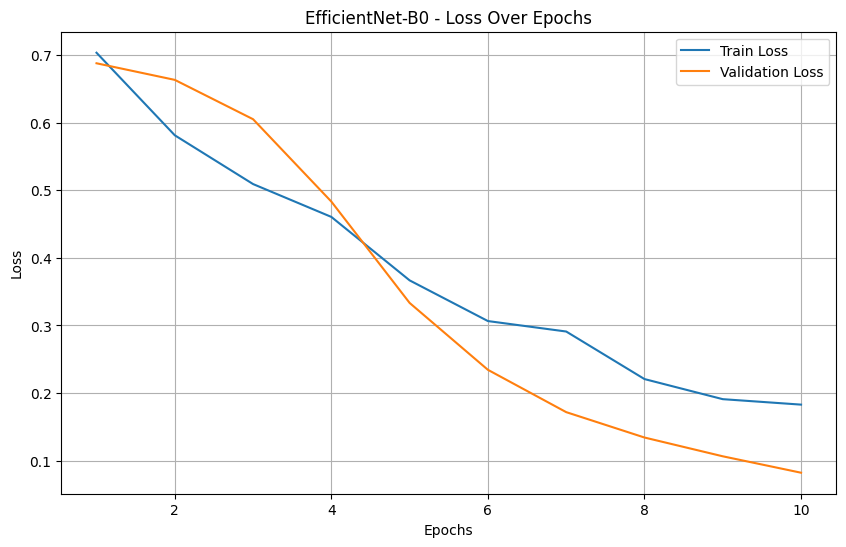

ConvNextTiny - Epoch 1/10, Train Loss: 0.7538, Val Loss: 0.6979
ConvNextTiny - Epoch 2/10, Train Loss: 0.6927, Val Loss: 0.6983
ConvNextTiny - Epoch 3/10, Train Loss: 0.6970, Val Loss: 0.6930
ConvNextTiny - Epoch 4/10, Train Loss: 0.6929, Val Loss: 0.6908
ConvNextTiny - Epoch 5/10, Train Loss: 0.6898, Val Loss: 0.6887
ConvNextTiny - Epoch 6/10, Train Loss: 0.6929, Val Loss: 0.6824
ConvNextTiny - Epoch 7/10, Train Loss: 0.6829, Val Loss: 0.6556
ConvNextTiny - Epoch 8/10, Train Loss: 0.7029, Val Loss: 0.6884
ConvNextTiny - Epoch 9/10, Train Loss: 0.6871, Val Loss: 0.6489
ConvNextTiny - Epoch 10/10, Train Loss: 0.6541, Val Loss: 0.5924


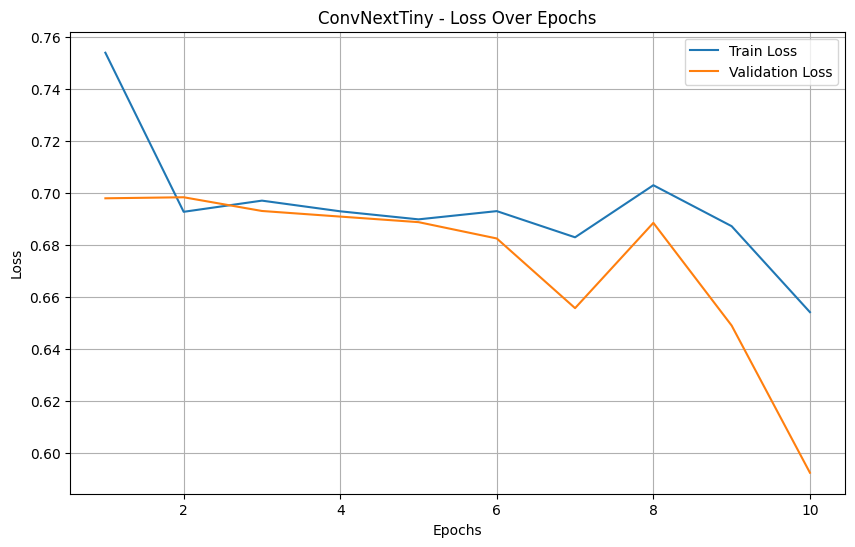

EfficientNet-B0 Test Metrics - Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1 Score: 100.00%


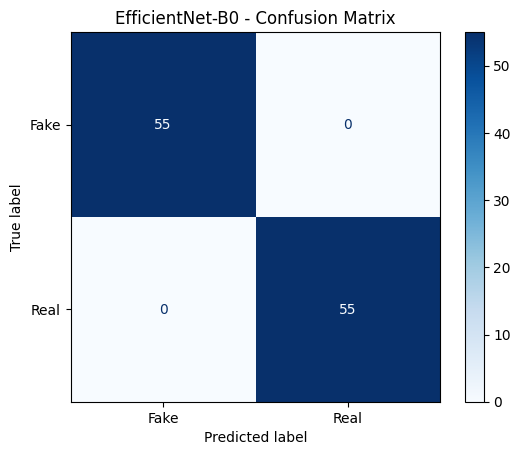

ConvNextTiny Test Metrics - Accuracy: 75.45%, Precision: 72.58%, Recall: 81.82%, F1 Score: 76.92%


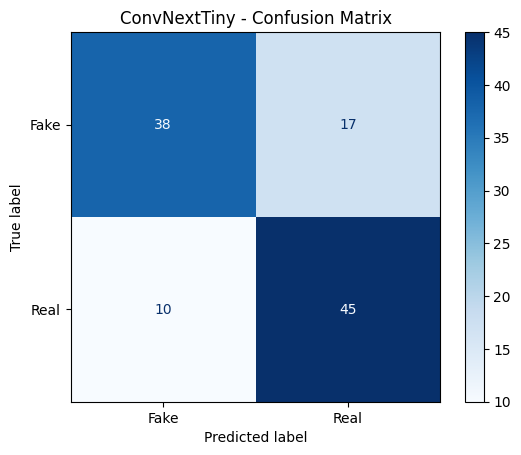

In [ ]:
import os
import torch
from timm import create_model
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 경로 및 전처리 설정
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"

# 데이터셋 균형화
fake_df = train_df[train_df['label'] == 0]
real_df = train_df[train_df['label'] == 1]
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)
balanced_labels = {f"{os.path.splitext(row['filename'])[0]}_processed.jpg": row['label'] for _, row in balanced_df.iterrows()}

# 이미지 전처리(transformations)
transform = transforms.Compose([
    transforms.Resize((160, 90)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)
convnext_tiny.to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer_efficientnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_efficientnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode="min", factor=0.5, patience=2)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# 학습 및 검증 함수
def train_and_evaluate(model, optimizer, scheduler, train_loader, val_loader, num_epochs, model_name):
    train_losses, val_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device).unsqueeze(1)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        scheduler.step(val_loss)

        print(f"{model_name} - Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.title(f"{model_name} - Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

# 테스트 함수
def test_model(model, test_loader, model_name):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            preds = (torch.sigmoid(outputs) > 0.5).cpu().numpy()
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())
    acc = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100
    print(f"{model_name} Test Metrics - Accuracy: {acc:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1 Score: {f1:.2f}%")
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"]).plot(cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# 학습 및 테스트 호출
train_and_evaluate(efficientnet_b0, optimizer_efficientnet, scheduler_efficientnet, train_loader, val_loader, 10, "EfficientNet-B0")
train_and_evaluate(convnext_tiny, optimizer_convnext, scheduler_convnext, train_loader, val_loader, 10, "ConvNextTiny")

test_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
test_model(efficientnet_b0, test_loader, "EfficientNet-B0")
test_model(convnext_tiny, test_loader, "ConvNextTiny")

Epoch 1/10, Train Loss: 0.7365, Val Loss: 0.6953
Epoch 2/10, Train Loss: 0.6825, Val Loss: 0.6687
Epoch 3/10, Train Loss: 0.6565, Val Loss: 0.6461
Epoch 4/10, Train Loss: 0.6341, Val Loss: 0.6087
Epoch 5/10, Train Loss: 0.6140, Val Loss: 0.5647
Epoch 6/10, Train Loss: 0.5912, Val Loss: 0.5541
Epoch 7/10, Train Loss: 0.5787, Val Loss: 0.5421
Epoch 8/10, Train Loss: 0.5410, Val Loss: 0.5287
Epoch 9/10, Train Loss: 0.5379, Val Loss: 0.5104
Epoch 10/10, Train Loss: 0.5287, Val Loss: 0.4869


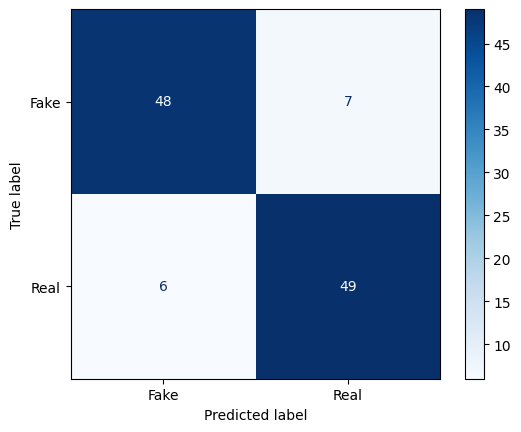

In [ ]:
import os
import torch
from timm import create_model
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# 데이터셋 클래스
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 데이터셋 경로
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"

# 데이터 균형화
fake_df = train_df[train_df['label'] == 0]
real_df = train_df[train_df['label'] == 1]
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)
balanced_labels = {f"{os.path.splitext(row['filename'])[0]}_processed.jpg": row['label'] for _, row in balanced_df.iterrows()}

# 데이터 증강
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# DataLoader
train_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)

# 모델 정의
class CustomModel(nn.Module):
    def __init__(self, model_name, pretrained=True, num_classes=1):
        super(CustomModel, self).__init__()
        self.backbone = create_model(model_name, pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(self.backbone.num_features, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

efficientnet_b0 = CustomModel("efficientnet_b0")
convnext_tiny = CustomModel("convnext_tiny")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)
convnext_tiny.to(device)

# 손실 함수 및 옵티마이저
criterion = nn.BCEWithLogitsLoss()
optimizer_effnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=5e-5, weight_decay=1e-4)
scheduler_effnet = torch.optim.lr_scheduler.StepLR(optimizer_effnet, step_size=5, gamma=0.5)
scheduler_convnext = torch.optim.lr_scheduler.StepLR(optimizer_convnext, step_size=5, gamma=0.5)

# 학습 함수
def train_model(model, optimizer, scheduler, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        val_loss = evaluate_model(model, val_loader)
        scheduler.step()
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 테스트 함수
def test_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"]).plot(cmap="Blues")
    plt.show()

# 모델 학습 및 테스트
train_model(efficientnet_b0, optimizer_effnet, scheduler_effnet, train_loader, val_loader)
test_model(efficientnet_b0, val_loader)

Balanced dataset size: 110
label
0    55
1    55
Name: count, dtype: int64
Training EfficientNet-B0...
Epoch 1/10 - Train Loss: 0.6903, Val Loss: 0.6961
Epoch 2/10 - Train Loss: 0.5991, Val Loss: 0.6726
Epoch 3/10 - Train Loss: 0.5146, Val Loss: 0.6357
Epoch 4/10 - Train Loss: 0.4831, Val Loss: 0.4923
Epoch 5/10 - Train Loss: 0.3903, Val Loss: 0.3425
Epoch 6/10 - Train Loss: 0.3448, Val Loss: 0.2509
Epoch 7/10 - Train Loss: 0.2988, Val Loss: 0.1872
Epoch 8/10 - Train Loss: 0.2274, Val Loss: 0.1426
Epoch 9/10 - Train Loss: 0.1790, Val Loss: 0.1080
Epoch 10/10 - Train Loss: 0.1583, Val Loss: 0.0824


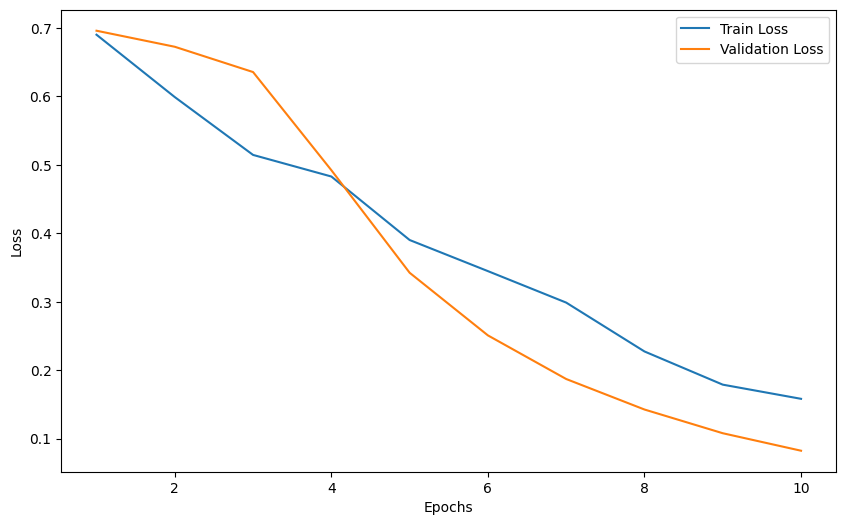

Testing EfficientNet-B0...
Test Metrics – Accuracy: 100.00%, Precision: 100.00%, Recall: 100.00%, F1 Score: 100.00%


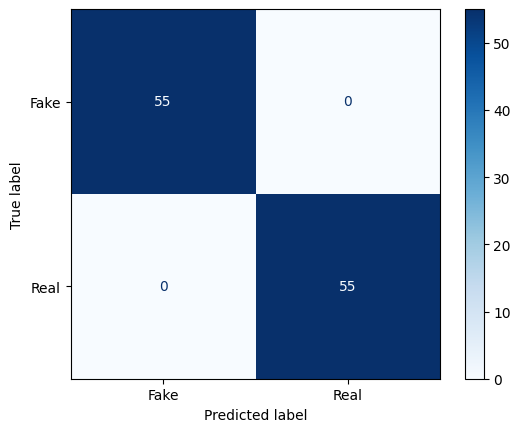

Training ConvNextTiny...
Epoch 1/10 - Train Loss: 0.7227, Val Loss: 0.6897
Epoch 2/10 - Train Loss: 0.7178, Val Loss: 0.6960
Epoch 3/10 - Train Loss: 0.7052, Val Loss: 0.6950
Epoch 4/10 - Train Loss: 0.6967, Val Loss: 0.6996
Epoch 5/10 - Train Loss: 0.6998, Val Loss: 0.6924
Epoch 6/10 - Train Loss: 0.6933, Val Loss: 0.6919
Epoch 7/10 - Train Loss: 0.6954, Val Loss: 0.6934
Epoch 8/10 - Train Loss: 0.6931, Val Loss: 0.6918
Epoch 9/10 - Train Loss: 0.6907, Val Loss: 0.6912
Epoch 10/10 - Train Loss: 0.6926, Val Loss: 0.6910


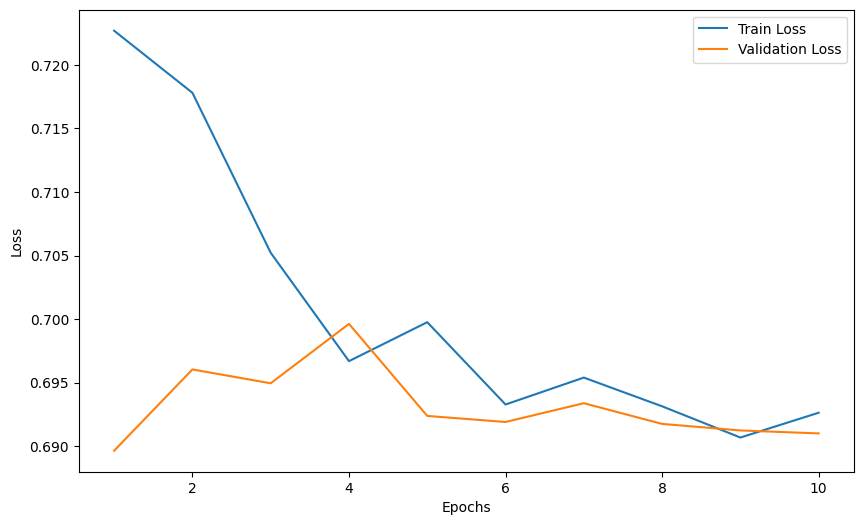

Testing ConvNextTiny...
Test Metrics – Accuracy: 50.00%, Precision: 0.00%, Recall: 0.00%, F1 Score: 0.00%


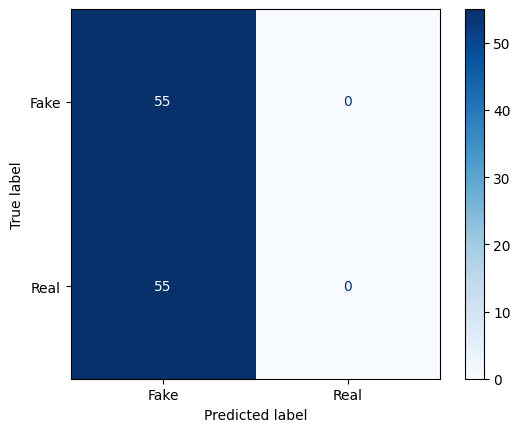

In [ ]:
import os
import torch
from timm import create_model
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 경로 및 전처리 설정
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"

# 데이터셋 균형화
# 가정: train_df에는 "filename"과 "label" 컬럼이 있음
fake_df = train_df[train_df['label'] == 0]
real_df = train_df[train_df['label'] == 1]

# Fake 데이터를 Real 데이터와 동일한 개수로 샘플링
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)

# Balanced 데이터셋 생성
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)
print(f"Balanced dataset size: {len(balanced_df)}")
print(balanced_df['label'].value_counts())

# 라벨 매핑 생성
balanced_labels = {f"{os.path.splitext(row['filename'])[0]}_processed.jpg": row['label']
                   for _, row in balanced_df.iterrows()}

# 이미지 전처리(transformations)
transform = transforms.Compose([
    transforms.Resize((160, 90)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# ConvNextTiny Training 코드
# EfficientNet-B0 코드와 비슷한 구조로 추가

# 모델 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)  # 768은 ConvNextTiny의 출력 크기

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# ConvNextTiny 초기화
convnext_tiny = CustomConvNextTiny(pretrained=True)
convnext_tiny.to(device)

# ConvNextTiny 손실함수 및 옵티마이저
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)
convnext_tiny.to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()

# EfficientNet-B0 옵티마이저 및 스케줄러
optimizer_effnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_effnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_effnet, mode="min", factor=0.5, patience=2)

# ConvNextTiny 옵티마이저 및 스케줄러
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# 학습 및 검증 함수
def train_model(model, optimizer, scheduler, train_loader, val_loader, num_epochs=10):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        val_loss = evaluate_model(model, val_loader)
        val_losses.append(val_loss)

        scheduler.step(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 테스트 함수
def test_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())

    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100
    print(f"Test Metrics – Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1 Score: {f1:.2f}%")
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"]).plot(cmap="Blues")
    plt.show()

# EfficientNet-B0 학습 및 테스트
print("Training EfficientNet-B0...")
train_model(efficientnet_b0, optimizer_effnet, scheduler_effnet, train_loader, val_loader, num_epochs=10)

print("Testing EfficientNet-B0...")
test_model(efficientnet_b0, val_loader)

# ConvNextTiny 학습 및 테스트
print("Training ConvNextTiny...")
train_model(convnext_tiny, optimizer_convnext, scheduler_convnext, train_loader, val_loader, num_epochs=10)

print("Testing ConvNextTiny...")
test_model(convnext_tiny, val_loader)

Training EfficientNet-B0...
EfficientNet-B0 – Epoch 1/10 – Train Loss: 0.7295, Val Loss: 0.7226
EfficientNet-B0 – Epoch 2/10 – Train Loss: 0.6820, Val Loss: 0.7204
EfficientNet-B0 – Epoch 3/10 – Train Loss: 0.6590, Val Loss: 0.7061
EfficientNet-B0 – Epoch 4/10 – Train Loss: 0.6299, Val Loss: 0.6858
EfficientNet-B0 – Epoch 5/10 – Train Loss: 0.6980, Val Loss: 0.6791
EfficientNet-B0 – Epoch 6/10 – Train Loss: 0.6202, Val Loss: 0.6772
EfficientNet-B0 – Epoch 7/10 – Train Loss: 0.5906, Val Loss: 0.6766
EfficientNet-B0 – Epoch 8/10 – Train Loss: 0.5915, Val Loss: 0.6607
EfficientNet-B0 – Epoch 9/10 – Train Loss: 0.6131, Val Loss: 0.6490
EfficientNet-B0 – Epoch 10/10 – Train Loss: 0.5984, Val Loss: 0.6552


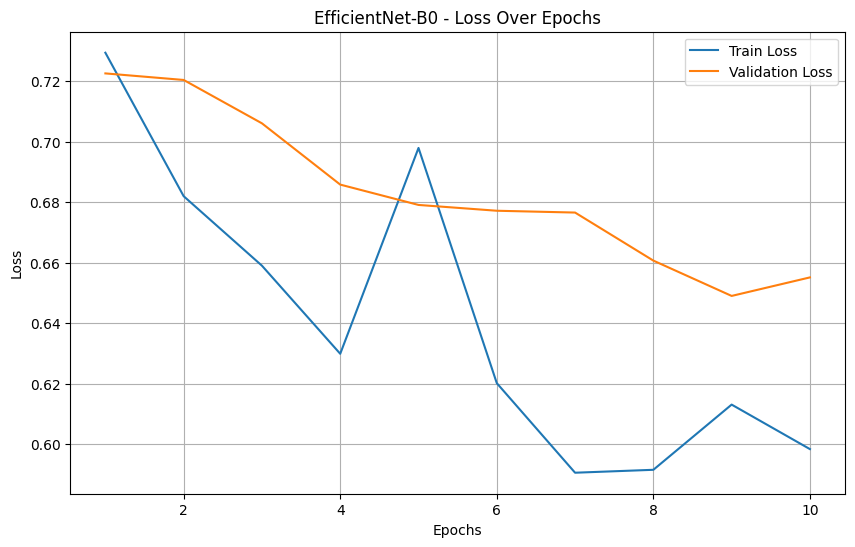

Testing EfficientNet-B0...
EfficientNet-B0 Test Metrics – Accuracy: 28.57%, Precision: 28.57%, Recall: 28.57%, F1 Score: 28.57%


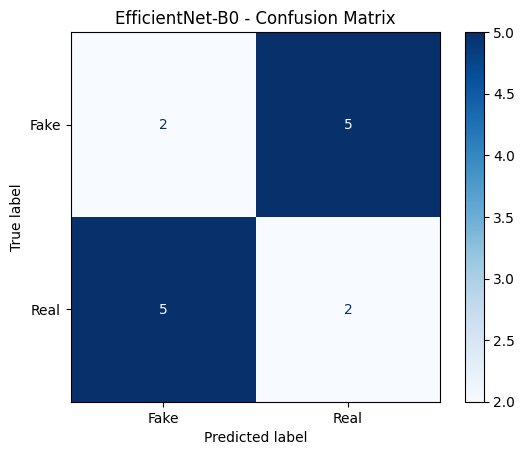

Training ConvNextTiny...
ConvNextTiny – Epoch 1/10 – Train Loss: 0.7695, Val Loss: 0.6859
ConvNextTiny – Epoch 2/10 – Train Loss: 0.6989, Val Loss: 0.6641
ConvNextTiny – Epoch 3/10 – Train Loss: 0.6844, Val Loss: 0.6687
ConvNextTiny – Epoch 4/10 – Train Loss: 0.6650, Val Loss: 0.6785
ConvNextTiny – Epoch 5/10 – Train Loss: 0.6605, Val Loss: 0.7157
ConvNextTiny – Epoch 6/10 – Train Loss: 0.7157, Val Loss: 0.6875
ConvNextTiny – Epoch 7/10 – Train Loss: 0.6790, Val Loss: 0.7232
ConvNextTiny – Epoch 8/10 – Train Loss: 0.7045, Val Loss: 0.7188
ConvNextTiny – Epoch 9/10 – Train Loss: 0.6578, Val Loss: 0.7035
ConvNextTiny – Epoch 10/10 – Train Loss: 0.6477, Val Loss: 0.7066


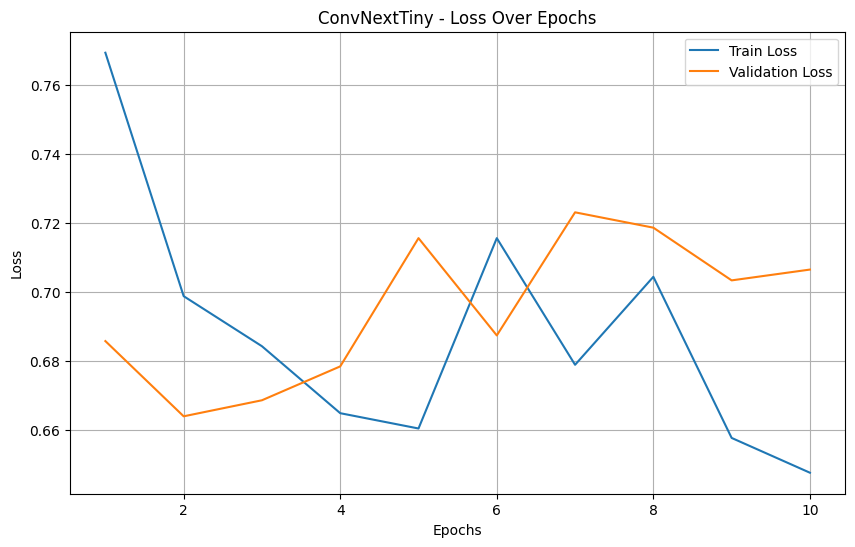

Testing ConvNextTiny...
ConvNextTiny Test Metrics – Accuracy: 42.86%, Precision: 33.33%, Recall: 14.29%, F1 Score: 20.00%


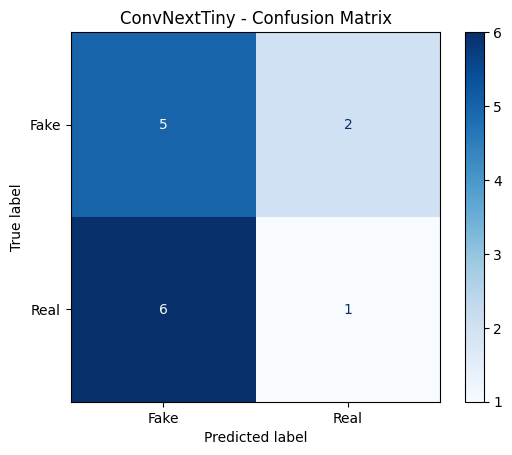

In [ ]:
import os
import torch
from timm import create_model
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 경로 및 데이터 로드
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"
# 가정: train_df는 "filename"과 "label" 컬럼이 있음
fake_df = train_df[train_df['label'] == 0]
real_df = train_df[train_df['label'] == 1]

# 데이터셋 균형화
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Train/Validation/Test Split
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['label'])
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

# 라벨 매핑 생성
train_labels = {f"{os.path.splitext(row['filename'])[0]}_processed.jpg": row['label'] for _, row in train_df.iterrows()}
val_labels = {f"{os.path.splitext(row['filename'])[0]}_processed.jpg": row['label'] for _, row in val_df.iterrows()}
test_labels = {f"{os.path.splitext(row['filename'])[0]}_processed.jpg": row['label'] for _, row in test_df.iterrows()}

# 데이터 증강 및 전처리
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.Resize((160, 90)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_test_transform = transforms.Compose([
    transforms.Resize((160, 90)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, train_labels, transform=train_transform)
val_dataset = ProcessedDataset(processed_dir, val_labels, transform=val_test_transform)
test_dataset = ProcessedDataset(processed_dir, test_labels, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

# 모델 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0 = CustomEfficientNetB0(pretrained=True).to(device)
convnext_tiny = CustomConvNextTiny(pretrained=True).to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()

optimizer_effnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_effnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_effnet, mode="min", factor=0.5, patience=2)

optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# 학습 및 테스트 함수
def train_model(model, optimizer, scheduler, train_loader, val_loader, num_epochs=10, model_name="Model"):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        val_loss = evaluate_model(model, val_loader)
        val_losses.append(val_loss)

        scheduler.step(val_loss)

        print(f"{model_name} – Epoch {epoch+1}/{num_epochs} – Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.title(f"{model_name} - Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

def test_model(model, test_loader, model_name="Model"):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())

    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100

    print(f"{model_name} Test Metrics – Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1 Score: {f1:.2f}%")
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"]).plot(cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# EfficientNet-B0 학습 및 테스트
print("Training EfficientNet-B0...")
train_model(efficientnet_b0, optimizer_effnet, scheduler_effnet, train_loader, val_loader, num_epochs=10, model_name="EfficientNet-B0")

print("Testing EfficientNet-B0...")
test_model(efficientnet_b0, test_loader, model_name="EfficientNet-B0")

# ConvNextTiny 학습 및 테스트
print("Training ConvNextTiny...")
train_model(convnext_tiny, optimizer_convnext, scheduler_convnext, train_loader, val_loader, num_epochs=10, model_name="ConvNextTiny")

print("Testing ConvNextTiny...")
test_model(convnext_tiny, test_loader, model_name="ConvNextTiny")

Training EfficientNet-B0...
Epoch 1/10 – Train Loss: 0.7052, Val Loss: 0.6795
Epoch 2/10 – Train Loss: 0.7103, Val Loss: 0.7044
Epoch 3/10 – Train Loss: 0.6822, Val Loss: 0.7135
Epoch 4/10 – Train Loss: 0.6604, Val Loss: 0.6936
Early stopping triggered.


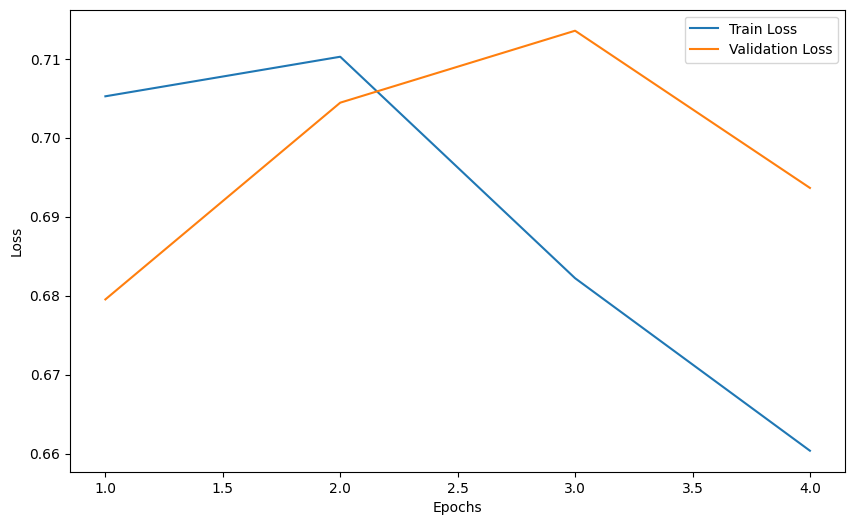

Testing EfficientNet-B0...
EfficientNet-B0 Test Metrics – Accuracy: 55.71%, Precision: 57.14%, Recall: 45.71%, F1 Score: 50.79%


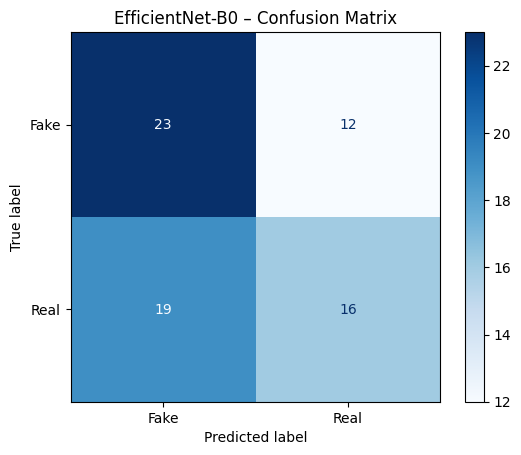

Training ConvNextTiny...
Epoch 1/10 – Train Loss: 0.7123, Val Loss: 0.6453
Epoch 2/10 – Train Loss: 0.6533, Val Loss: 0.6012
Epoch 3/10 – Train Loss: 0.6354, Val Loss: 0.5697
Epoch 4/10 – Train Loss: 0.5577, Val Loss: 0.5199
Epoch 5/10 – Train Loss: 0.5465, Val Loss: 0.4655
Epoch 6/10 – Train Loss: 0.4618, Val Loss: 0.4081
Epoch 7/10 – Train Loss: 0.3857, Val Loss: 0.3413
Epoch 8/10 – Train Loss: 0.2945, Val Loss: 0.2487
Epoch 9/10 – Train Loss: 0.2467, Val Loss: 0.1585
Epoch 10/10 – Train Loss: 0.2017, Val Loss: 0.1435


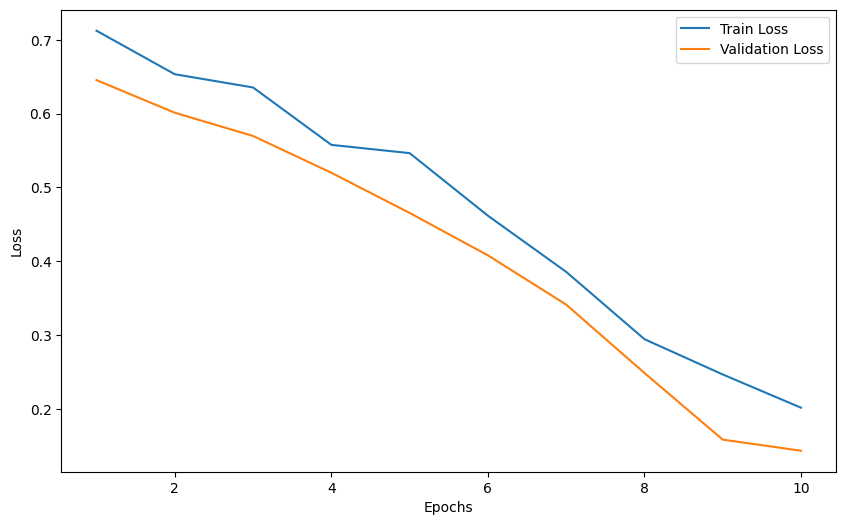

Testing ConvNextTiny...
ConvNextTiny Test Metrics – Accuracy: 97.14%, Precision: 97.14%, Recall: 97.14%, F1 Score: 97.14%


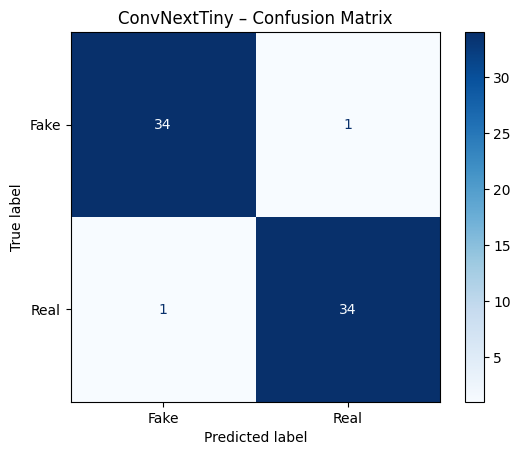

In [ ]:
import os
import torch
from timm import create_model
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 경로 및 데이터 준비
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"
fake_df = train_df[train_df['label'] == 0]
real_df = train_df[train_df['label'] == 1]

# 데이터 균형화
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)
balanced_labels = {f"{os.path.splitext(row['filename'])[0]}_processed.jpg": row['label']
                   for _, row in balanced_df.iterrows()}

# 이미지 전처리(transformations)
transform = transforms.Compose([
    transforms.Resize((160, 90)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)
convnext_tiny.to(device)

# 손실 함수 및 옵티마이저
criterion = nn.BCEWithLogitsLoss()
optimizer_effnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-5, weight_decay=1e-4)
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-5, weight_decay=1e-4)
scheduler_effnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_effnet, mode="min", factor=0.5, patience=2)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

# 학습 및 검증 함수
def train_model(model, optimizer, scheduler, train_loader, val_loader, num_epochs=10):
    train_losses, val_losses = [], []
    early_stopping_patience = 3
    best_val_loss = float('inf')
    stop_count = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        val_loss = evaluate_model(model, val_loader)
        val_losses.append(val_loss)
        scheduler.step(val_loss)
        print(f"Epoch {epoch+1}/{num_epochs} – Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            stop_count = 0
        else:
            stop_count += 1
            if stop_count >= early_stopping_patience:
                print("Early stopping triggered.")
                break

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
    plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 테스트 함수
def test_model(model, test_loader, model_name):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())

    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100
    print(f"{model_name} Test Metrics – Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1 Score: {f1:.2f}%")
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"]).plot(cmap="Blues")
    plt.title(f"{model_name} – Confusion Matrix")
    plt.show()

# EfficientNet-B0 학습 및 테스트
print("Training EfficientNet-B0...")
train_model(efficientnet_b0, optimizer_effnet, scheduler_effnet, train_loader, val_loader, num_epochs=10)
print("Testing EfficientNet-B0...")
test_model(efficientnet_b0, val_loader, "EfficientNet-B0")

# ConvNextTiny 학습 및 테스트
print("Training ConvNextTiny...")
train_model(convnext_tiny, optimizer_convnext, scheduler_convnext, train_loader, val_loader, num_epochs=10)
print("Testing ConvNextTiny...")
test_model(convnext_tiny, val_loader, "ConvNextTiny")

Balanced dataset size: 70
label
1    35
0    35
Name: count, dtype: int64
Training EfficientNet-B0...
Epoch 1/20 – Train Loss: 0.7282, Val Loss: 0.7200
Epoch 2/20 – Train Loss: 0.7122, Val Loss: 0.7079
Epoch 3/20 – Train Loss: 0.6920, Val Loss: 0.7075
Epoch 4/20 – Train Loss: 0.7038, Val Loss: 0.6981
Epoch 5/20 – Train Loss: 0.6807, Val Loss: 0.6907
Epoch 6/20 – Train Loss: 0.6917, Val Loss: 0.7211
Epoch 7/20 – Train Loss: 0.7168, Val Loss: 0.7196
Epoch 8/20 – Train Loss: 0.7006, Val Loss: 0.7100
Epoch 9/20 – Train Loss: 0.6970, Val Loss: 0.7226
Epoch 10/20 – Train Loss: 0.6920, Val Loss: 0.6767
Epoch 11/20 – Train Loss: 0.6849, Val Loss: 0.7166
Epoch 12/20 – Train Loss: 0.7248, Val Loss: 0.6944
Epoch 13/20 – Train Loss: 0.6977, Val Loss: 0.7244
Epoch 14/20 – Train Loss: 0.7018, Val Loss: 0.7123
Epoch 15/20 – Train Loss: 0.7112, Val Loss: 0.6820
Epoch 16/20 – Train Loss: 0.7108, Val Loss: 0.6830
Epoch 17/20 – Train Loss: 0.6951, Val Loss: 0.6827
Epoch 18/20 – Train Loss: 0.6659, Val Lo

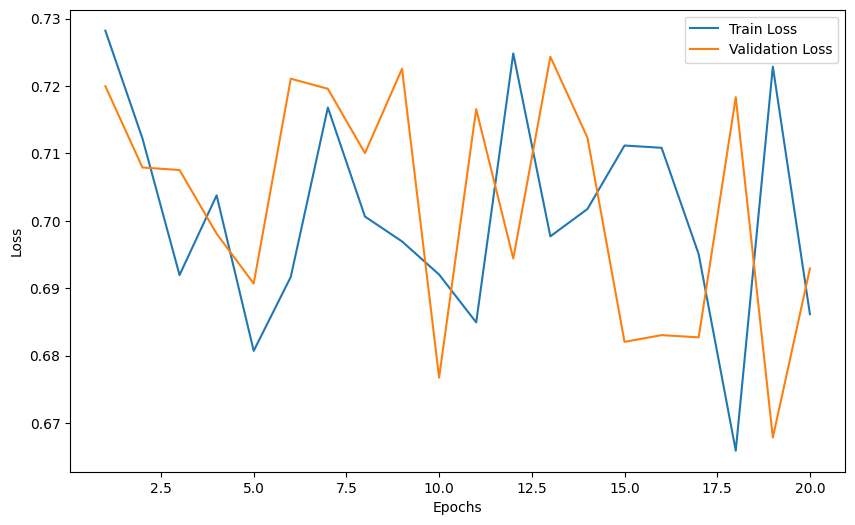

Testing EfficientNet-B0...
Test Metrics – Accuracy: 51.43%, Precision: 51.72%, Recall: 42.86%, F1 Score: 46.88%


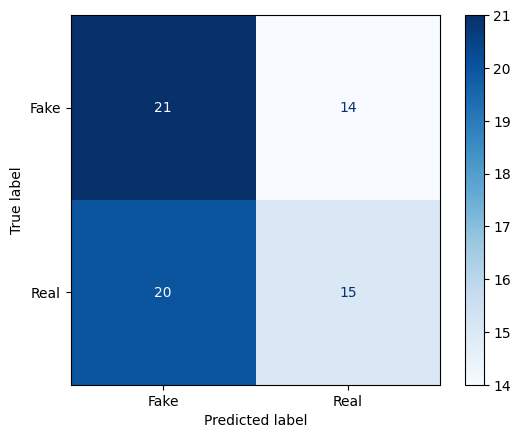

Training ConvNextTiny...
Epoch 1/20 – Train Loss: 0.8352, Val Loss: 0.7074
Epoch 2/20 – Train Loss: 0.7016, Val Loss: 0.6915
Epoch 3/20 – Train Loss: 0.6971, Val Loss: 0.6922
Epoch 4/20 – Train Loss: 0.7053, Val Loss: 0.6927
Epoch 5/20 – Train Loss: 0.6981, Val Loss: 0.7038
Epoch 6/20 – Train Loss: 0.7010, Val Loss: 0.7050
Epoch 7/20 – Train Loss: 0.6991, Val Loss: 0.6937
Epoch 8/20 – Train Loss: 0.7057, Val Loss: 0.6933
Epoch 9/20 – Train Loss: 0.7058, Val Loss: 0.6926
Epoch 10/20 – Train Loss: 0.7034, Val Loss: 0.6994
Epoch 11/20 – Train Loss: 0.7017, Val Loss: 0.6984
Epoch 12/20 – Train Loss: 0.6927, Val Loss: 0.6926
Epoch 13/20 – Train Loss: 0.6949, Val Loss: 0.6921
Epoch 14/20 – Train Loss: 0.6920, Val Loss: 0.6920
Epoch 15/20 – Train Loss: 0.6897, Val Loss: 0.6919
Epoch 16/20 – Train Loss: 0.6991, Val Loss: 0.6922
Epoch 17/20 – Train Loss: 0.6948, Val Loss: 0.6932
Epoch 18/20 – Train Loss: 0.6992, Val Loss: 0.6944
Epoch 19/20 – Train Loss: 0.6927, Val Loss: 0.6931
Epoch 20/20 – T

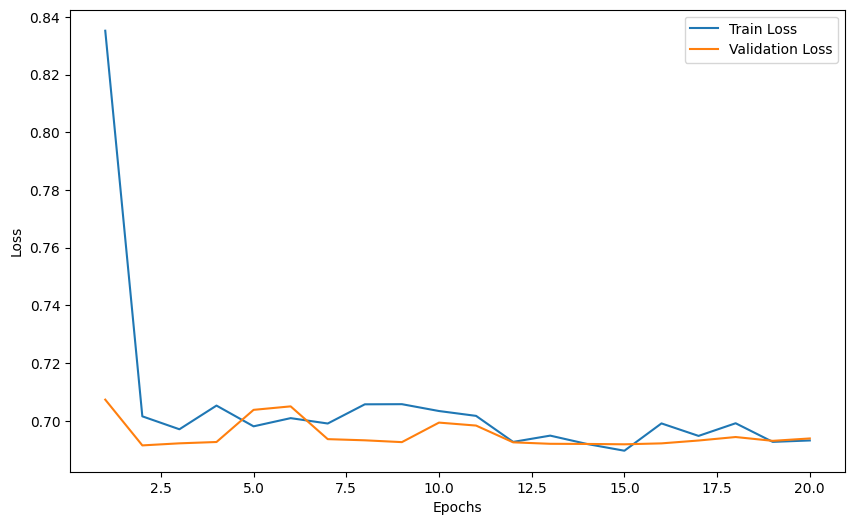

Testing ConvNextTiny...
Test Metrics – Accuracy: 50.00%, Precision: 0.00%, Recall: 0.00%, F1 Score: 0.00%


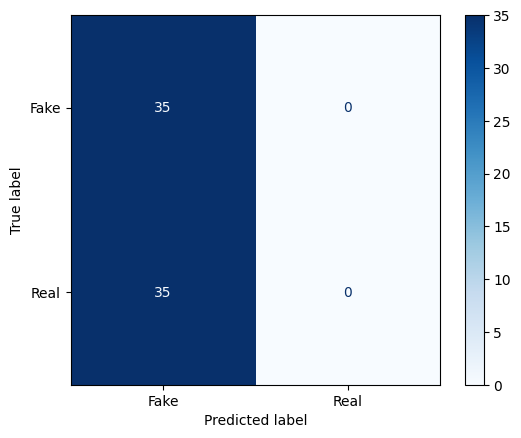

In [ ]:
import os
import torch
from timm import create_model
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# 데이터셋 클래스 정의
class ProcessedDataset(Dataset):
    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.labels = labels
        self.transform = transform
        self.image_files = list(labels.keys())

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx]
        label = self.labels[image_file]
        image_path = os.path.join(self.image_dir, image_file)
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)

# 경로 및 전처리 설정
processed_dir = "/content/drive/MyDrive/Colab Notebooks/processed_videos"

# 데이터셋 균형화
# 가정: train_df에는 "filename"과 "label" 컬럼이 있음
fake_df = train_df[train_df['label'] == 0]
real_df = train_df[train_df['label'] == 1]

# Fake 데이터를 Real 데이터와 동일한 개수로 샘플링
fake_sampled = resample(fake_df, replace=False, n_samples=len(real_df), random_state=42)

# Balanced 데이터셋 생성
balanced_df = pd.concat([real_df, fake_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)
print(f"Balanced dataset size: {len(balanced_df)}")
print(balanced_df['label'].value_counts())

# 라벨 매핑 생성
balanced_labels = {f"{os.path.splitext(row['filename'])[0]}_processed.jpg": row['label']
                   for _, row in balanced_df.iterrows()}

# 이미지 전처리(transformations) – 데이터 증강 포함
transform = transforms.Compose([
    transforms.Resize((160, 90)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = ProcessedDataset(processed_dir, balanced_labels, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# EfficientNet-B0 모델 정의
class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        for param in self.backbone.parameters():
            param.requires_grad = False  # Backbone을 freezing
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# ConvNextTiny 모델 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)
        self.dropout = nn.Dropout(p=0.5)  # Dropout 추가
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True)
convnext_tiny = CustomConvNextTiny(pretrained=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet_b0.to(device)
convnext_tiny.to(device)

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()

# EfficientNet-B0 옵티마이저 및 스케줄러
optimizer_effnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-5, weight_decay=1e-4)
scheduler_effnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_effnet, mode="min", factor=0.5, patience=5)

# ConvNextTiny 옵티마이저 및 스케줄러
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.7, patience=3)

# 학습 및 검증 함수
def train_model(model, optimizer, scheduler, train_loader, val_loader, num_epochs=10):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        val_loss = evaluate_model(model, val_loader)
        val_losses.append(val_loss)

        scheduler.step(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} – Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(val_loader)

# 테스트 함수
def test_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).unsqueeze(1)
            outputs = model(images)
            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())

    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100
    print(f"Test Metrics – Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1 Score: {f1:.2f}%")
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"]).plot(cmap="Blues")
    plt.show()

# EfficientNet-B0 학습 및 테스트
print("Training EfficientNet-B0...")
train_model(efficientnet_b0, optimizer_effnet, scheduler_effnet, train_loader, val_loader, num_epochs=20)

print("Testing EfficientNet-B0...")
test_model(efficientnet_b0, val_loader)

# ConvNextTiny 학습 및 테스트
print("Training ConvNextTiny...")
train_model(convnext_tiny, optimizer_convnext, scheduler_convnext, train_loader, val_loader, num_epochs=20)

print("Testing ConvNextTiny...")
test_model(convnext_tiny, val_loader)